<a href="https://colab.research.google.com/github/d-vf/notebooks/blob/master/Public_Policies_Data_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VC

Data:

* Venture Capital Investments (PT)
* QREN (Dataset: QREN: Period: 2007-2014)
* IPR: INPI (Trademarks, Patents, Design)
* Shapefiles (https://dados.gov.pt/en/datasets/concelhos-de-portugal/)
* ID: NIF 

# Libraries

In [1]:
#For reading Google sheets
! pip install gspread-pandas

# For geo
! pip install geopandas

# For network
! pip install networkx

# For data imputation
! pip install fancyimpute  
! pip install scikit-learn

     |████████████████████████████████| 962kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 16.4MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 


In [2]:
#Base
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#Google drive
import google.colab

# Load the Drive helper and mount
from google.colab import drive

In [3]:
#get access to gs
import gspread_pandas
from gspread_pandas import Spread, Client

#geopandas
import geopandas as gpd 

#network analysis
import networkx as nx

In [4]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
# files in "content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work".
!ls "/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work"

 abc.xlsx		   Final_table.gsheet
 cumming2014.pdf	   Finaltable.gsheet
 Data			   link2010.pdf
 describe.csv		   newlist.csv
 describe.gsheet	   newlistIP.csv
'Final_table (1).gsheet'  'Public funding vc date070620.docx'
'Finaltable (1).gsheet'   'Public funding vc date170620.docx'
'Finaltable (2).gsheet'   'Public Policies - Data Treatment.ipynb'
 Final_table_3.csv	  'References and Archive'
 Final_table.csv	  'VC and Public Funds Probit R.ipynb'
 Finaltable.csv		   w14057.pdf


In [6]:
os.chdir('/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work') # Provide the new path here

In [7]:
os.getcwd()

'/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work'

# Data

## QREN

In [8]:
url_qren="https://raw.githubusercontent.com/d-vf/qren-2007-2014/gh-pages/data/qren-2007-2014.csv"
qren=pd.read_csv(url_qren, encoding="ISO-8859-1")

In [9]:
qren.dtypes

N Proj                                 int64
Promotor                              object
Designacao                            object
Instrumento                           object
Aviso                                 object
Aut Gestao                            object
Org Intermedio                        object
Concelho                              object
Regiao                                object
Sector                                object
CAE (Rev3)                            object
Estrategia de Eficiencia Colectiva    object
Data de Aprovacao                     object
Investimento Elegivel                  int64
Incentivo                              int64
N Contribuinte do Promotor             int64
dtype: object

In [10]:
qren['Sector'] = qren['Sector'].astype('category')
qren['Concelho'] = qren['Concelho'].astype('category')
qren['Regiao'] = qren['Regiao'].astype('category')
qren['CAE (Rev3)'] = qren['CAE (Rev3)'].astype('category')

In [11]:
qren['NIF'] = qren['N Contribuinte do Promotor']

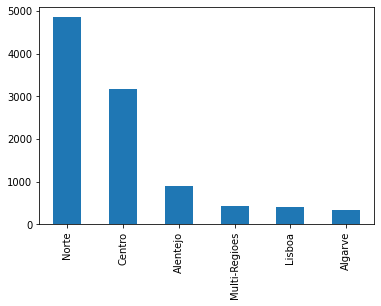

In [12]:
qren['Regiao'].value_counts().plot(kind='bar')

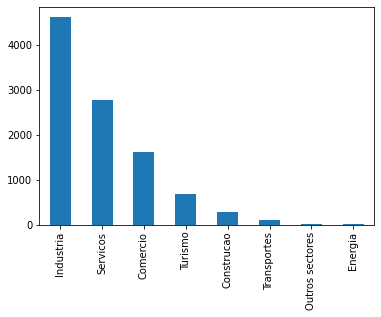

In [13]:
qren['Sector'].value_counts().plot(kind='bar')

In [14]:
qren['N Contribuinte do Promotor'].nunique()

6955

In [15]:
qren['Instrumento'].nunique()

17

In [16]:
qren['Instrumento'].unique()

array(['SI Inovacao/Inovacao Produtiva',
       'I&DT Empresas/Projectos Individuais',
       'SI Qualificacao PME/Vale Inovacao',
       'SI Qualificacao PME/Projectos Individuais e de Cooperacao',
       'SI Inovacao/Empreendedorismo Qualificado',
       'I&DT Empresas/Projectos em Co-promocao',
       'SI Qualificacao PME/Projectos Conjuntos',
       'I&DT Empresas/Projectos em Co-promocao/Regime Especial',
       'Sistema de Incentivos de Apoio Local a Microempresas (SIALM)',
       'SI Inovacao/Projectos do Regime Especial',
       'SI Inovacao/Projectos de Interesse Estrategico',
       'Criacao e Reforco de competencias Internas de I&DT/Nucleos de I&DT',
       'I&DT Empresas/Projectos Individuais/Regime Especial',
       'I&DT Empresas/Vale I&DT', 'I&DT Empresas/Projectos Mobilizadores',
       'Projectos transitados do QCA III', 'I&DT Colectiva'], dtype=object)

In [17]:
qren['Instrumento'].count()

10092

### Grouping per NIF

In [18]:
QREN_investimento_count = qren['Investimento Elegivel'].groupby([qren['N Contribuinte do Promotor']]).count()

In [19]:
QREN_investimento_count

N Contribuinte do Promotor
100256538    1
101653069    1
102127239    1
103848223    1
106144154    1
            ..
900976934    1
901155675    1
901674311    1
980373441    2
980430500    1
Name: Investimento Elegivel, Length: 6955, dtype: int64

In [20]:
QREN_investimento_total = qren['Investimento Elegivel'].groupby([qren['N Contribuinte do Promotor']]).sum()

In [21]:
QREN_investimento_total

N Contribuinte do Promotor
100256538      33101
101653069      13300
102127239      33500
103848223      20489
106144154     103402
              ...   
900976934      61233
901155675      25000
901674311      20000
980373441    3183575
980430500     800450
Name: Investimento Elegivel, Length: 6955, dtype: int64

In [22]:
QREN_sector = qren.groupby('N Contribuinte do Promotor')['Sector'].agg(lambda x:x.value_counts().index[0])

In [23]:
QREN_sector

N Contribuinte do Promotor
100256538     Comercio
101653069      Turismo
102127239    Industria
103848223      Turismo
106144154     Comercio
               ...    
900976934      Turismo
901155675    Industria
901674311     Comercio
980373441      Turismo
980430500    Industria
Name: Sector, Length: 6955, dtype: object

In [24]:
QREN_CAE = qren.groupby('N Contribuinte do Promotor')['CAE (Rev3)'].agg(lambda x:x.value_counts().index[0])
QREN_CAE

N Contribuinte do Promotor
100256538    47740 - Comercio a retalho de produtos medicos...
101653069                      55202 - Turismo no espaco rural
102127239                  08113 - Extraccao de calcario e cre
103848223                      55202 - Turismo no espaco rural
106144154    47240 - Comercio a retalho de pao, de produtos...
                                   ...                        
900976934                       55111 - Hoteis com restaurante
901155675        11021 - Producao de vinhos comuns e licorosos
901674311    45320 - Comercio a retalho de pecas e acessori...
980373441              96040 - Actividades de bem-estar fisico
980430500    20594 - Fabricacao de outros produtos quimicos...
Name: CAE (Rev3), Length: 6955, dtype: object

In [25]:
QREN_CAE.mode()

0    71120 - Actividades de engenharia e tecnicas a...
dtype: object

In [26]:
QREN_instrumento = qren.groupby('N Contribuinte do Promotor')['Instrumento'].agg(lambda x:x.value_counts().index[0])

In [27]:
QREN_instrumento

N Contribuinte do Promotor
100256538    Sistema de Incentivos de Apoio Local a Microem...
101653069    Sistema de Incentivos de Apoio Local a Microem...
102127239                    SI Qualificacao PME/Vale Inovacao
103848223    SI Qualificacao PME/Projectos Individuais e de...
106144154                       SI Inovacao/Inovacao Produtiva
                                   ...                        
900976934    SI Qualificacao PME/Projectos Individuais e de...
901155675                    SI Qualificacao PME/Vale Inovacao
901674311                    SI Qualificacao PME/Vale Inovacao
980373441                       SI Inovacao/Inovacao Produtiva
980430500                       SI Inovacao/Inovacao Produtiva
Name: Instrumento, Length: 6955, dtype: object

In [28]:
QREN_Concelho = qren.groupby('N Contribuinte do Promotor')['Concelho'].agg(lambda x:x.value_counts().index[0])

In [29]:
QREN_Concelho

N Contribuinte do Promotor
100256538            Braganca
101653069    Viana do Castelo
102127239            Santarem
103848223    Sao Pedro do Sul
106144154              Chaves
                   ...       
900976934            Mealhada
901155675              Lamego
901674311              Tavira
980373441              Vizela
980430500          Portalegre
Name: Concelho, Length: 6955, dtype: object

In [30]:
QREN_Regiao = qren.groupby('N Contribuinte do Promotor')['Regiao'].agg(lambda x:x.value_counts().index[0])

In [31]:
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Jan','01')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Fev','02')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Mar','03')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Abr','04')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Mai','05')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Jun','06')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Jul','07')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Ago','08')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Set','09')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Out','10')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Nov','11')
qren['Data de Aprovacao'] = qren['Data de Aprovacao'].str.replace('Dez','12')

In [32]:
qren['Data de Aprovacao'] = pd.to_datetime(qren['Data de Aprovacao'], infer_datetime_format=True)

In [33]:
qren['Data de Aprovacao']

0       2014-11-21
1       2014-12-11
2       2014-10-30
3       2014-08-14
4       2014-08-14
           ...    
10087   2008-02-28
10088   2008-02-28
10089   2008-02-28
10090   2008-02-28
10091   2008-02-28
Name: Data de Aprovacao, Length: 10092, dtype: datetime64[ns]

In [34]:
QREN_date = qren['Data de Aprovacao'].groupby([qren['N Contribuinte do Promotor']]).min() 

In [35]:
QREN_date

N Contribuinte do Promotor
100256538   2013-12-23
101653069   2013-08-28
102127239   2009-03-02
103848223   2011-02-16
106144154   2010-01-02
               ...    
900976934   2011-02-16
901155675   2012-05-17
901674311   2013-12-03
980373441   2012-03-08
980430500   2010-04-06
Name: Data de Aprovacao, Length: 6955, dtype: datetime64[ns]

In [36]:
QREN_frames = [QREN_investimento_count,QREN_investimento_total, QREN_sector, QREN_CAE,QREN_instrumento, QREN_Concelho, QREN_Regiao, QREN_date]
QREN_result = pd.concat(QREN_frames, axis=1)

In [37]:
QREN_result

,Investimento Elegivel,Investimento Elegivel,Sector,CAE (Rev3),Instrumento,Concelho,Regiao,Data de Aprovacao
N Contribuinte do Promotor,,,,,,,,
100256538,1,33101,Comercio,47740 - Comercio a retalho de produtos medicos...,Sistema de Incentivos de Apoio Local a Microem...,Braganca,Norte,2013-12-23
101653069,1,13300,Turismo,55202 - Turismo no espaco rural,Sistema de Incentivos de Apoio Local a Microem...,Viana do Castelo,Norte,2013-08-28
102127239,1,33500,Industria,08113 - Extraccao de calcario e cre,SI Qualificacao PME/Vale Inovacao,Santarem,Alentejo,2009-03-02
103848223,1,20489,Turismo,55202 - Turismo no espaco rural,SI Qualificacao PME/Projectos Individuais e de...,Sao Pedro do Sul,Centro,2011-02-16
106144154,1,103402,Comercio,"47240 - Comercio a retalho de pao, de produtos...",SI Inovacao/Inovacao Produtiva,Chaves,Norte,2010-01-02
...,...,...,...,...,...,...,...,...
900976934,1,61233,Turismo,55111 - Hoteis com restaurante,SI Qualificacao PME/Projectos Individuais e de...,Mealhada,Centro,2011-02-16
901155675,1,25000,Industria,11021 - Producao de vinhos comuns e licorosos,SI Qualificacao PME/Vale Inovacao,Lamego,Norte,2012-05-17
901674311,1,20000,Comercio,45320 - Comercio a retalho de pecas e acessori...,SI Qualificacao PME/Vale Inovacao,Tavira,Algarve,2013-12-03


In [38]:
QREN_result.columns

Index(['Investimento Elegivel', 'Investimento Elegivel', 'Sector',
       'CAE (Rev3)', 'Instrumento', 'Concelho', 'Regiao', 'Data de Aprovacao'],
      dtype='object')

In [39]:
QREN_result.columns = ['QREN_Investimento_Elegivel_N_Operações', 
                      'QREN_Investimento_Elegivel_Total',
                      'QREN_Sector',
                      'QREN_CAE_Rev3',
                      'QREN_Instrumento',
                      'QREN_Concelho',
                      'QREN_Regiao',
                      'QREN_Data_de_Aprovacao']               

In [40]:
QREN_result.columns

Index(['QREN_Investimento_Elegivel_N_Operações',
       'QREN_Investimento_Elegivel_Total', 'QREN_Sector', 'QREN_CAE_Rev3',
       'QREN_Instrumento', 'QREN_Concelho', 'QREN_Regiao',
       'QREN_Data_de_Aprovacao'],
      dtype='object')

##IPR (as output)

In [41]:
df_trademarks19062020 = pd.read_csv('/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/Data/IPR - INPI Scrappers/online_services 2/online_services/output_trademarks19062020.csv') 
df_patents19062020 = pd.read_csv('/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/Data/IPR - INPI Scrappers/online_services 2/online_services/output_patents19062020.csv') 
df_design19062020 = pd.read_csv('/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/Data/IPR - INPI Scrappers/online_services 2/online_services/output_design19062020.csv') 

In [42]:
df_trademarkslist = pd.read_csv('/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/Data/IPR - INPI Scrappers/online_services/online_services/output_trademarkslist.csv') 
df_patentslist = pd.read_csv('/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/Data/IPR - INPI Scrappers/online_services/online_services/output_patentslist.csv') 
df_designlist = pd.read_csv('/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/Data/IPR - INPI Scrappers/online_services/online_services/output_designlist.csv') 

### Trademarks

In [43]:
df_trademarks19062020.tail(50)

,N Contribuinte do Promotor,depth,download_timeout,download_slot,download_latency,success,nord,moda,nume_proc,tipo_sinal,sinal,num_pedido,dt_apresentacao,dt_pedido,tipo_moda,fase_actual,dt_ini_fase_actual,dt_fim_fase_actual,stp_actual,dt_ini_stp_actual,dt_fim_stp_actual,taxas_pagas,taxas_devidas,dt_ultima_diu,bpi_prim,dt_despacho,bpi_despacho,dt_ini_vigencia,dt_limite_vigencia,nice,nome_mand,proc_trib,trib,data_trib,ext_link,link_bpi_prim,link_bpi_despacho,senioridade,subtipo_sinal,copia_certificada,imagem,enti,imagemFase,imagemTipo
18392,506538486,2,180.0,servicosonline.inpi.pt,0.349785,True,3884623,National Trademark,498391,WORD,DAVIDSON,1000030085,16-04-2012,16-04-2012,NOT APPLICABLE,REGISTRATION GRANTED,09-07-2012,---,MAINT. FEES FULLY PAID,09-07-2012,04-01-2022,1,0,---,23-04-2012,04-07-2012,09-07-2012,04-07-2012,---,33,JOÃO LUÍS PEREIRA GARCIA,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,-1,"WINE AND SOUL, LDA.",M06,S
18393,506538486,2,180.0,servicosonline.inpi.pt,0.250516,True,3788335,National Trademark,491750,WORD,#3,1000089959,24-11-2011,24-11-2011,NOT APPLICABLE,REGISTRATION REFUSED,23-07-2012,---,NO MAINT. FEES PERTINENT,24-11-2011,---,0,0,---,02-12-2011,17-04-2012,23-04-2012,---,---,33,JOÃO LUÍS PEREIRA GARCIA,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,N,-1,"WINE AND SOUL, LDA.",M11,L
18394,506538486,2,180.0,servicosonline.inpi.pt,0.330880,True,3479445,National Trademark,485997,MIXED,QUINTA DA MANOELLA VINHAS VELHAS,13245,13-07-2011,13-07-2011,NOT APPLICABLE,REGISTRATION GRANTED,03-10-2011,---,MAINT. FEES FULLY PAID,03-10-2011,29-03-2021,1,0,---,19-07-2011,28-09-2011,03-10-2011,28-09-2011,---,33,JOÃO LUÍS PEREIRA GARCIA,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,1,"WINE AND SOUL, LDA.",M06,S
18395,506538486,2,180.0,servicosonline.inpi.pt,0.314394,True,3408096,National Trademark,479217,WORD,4MÃOS,1000013228,16-02-2011,16-02-2011,NOT APPLICABLE,REGISTRATION GRANTED,06-05-2011,---,MAINT. FEES FULLY PAID,06-05-2011,03-11-2020,1,0,---,23-02-2011,03-05-2011,06-05-2011,03-05-2011,---,33,JOÃO LUÍS PEREIRA GARCIA,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,-1,"WINE AND SOUL, LDA.",M06,S
18396,506538486,2,180.0,servicosonline.inpi.pt,0.306528,True,3398781,National Trademark,478000,WORD,WS GURU,1000007457,27-01-2011,08-06-2011,NOT APPLICABLE,REGISTRATION GRANTED,09-09-2011,---,MAINT. FEES FULLY PAID,09-09-2011,08-03-2021,1,0,---,03-02-2011,06-09-2011,09-09-2011,06-09-2011,---,33,JOÃO LUÍS PEREIRA GARCIA,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,-1,"WINE AND SOUL, LDA.",M06,S
18397,506538486,2,180.0,servicosonline.inpi.pt,0.309828,True,3324841,National Trademark,470368,WORD,QUINTA DA MANOELLA,1000060699,03-08-2010,03-08-2010,NOT APPLICABLE,REGISTRATION GRANTED,18-10-2010,---,RENEWAL FEE PAYABLE,13-04-2020,13-10-2020,1,0,---,10-08-2010,13-10-2010,18-10-2010,13-10-2010,---,33,JOÃO LUÍS PEREIRA GARCIA,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,-1,"WINE AND SOUL, LDA.",M06,S
18398,506538486,2,180.0,servicosonline.inpi.pt,0.348550,True,3188667,National Trademark,454019,WORD,MANUELA VV,1000084717,08-09-2009,08-09-2009,NOT APPLICABLE,REGISTRATION REFUSED,28-02-2012,---,NO MAINT. FEES PERTINENT,08-09-2009,---,0,0,---,16-09-2009,15-11-2011,28-11-2011,---,---,33,JOÃO LUÍS PEREIRA GARCIA,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,N,-1,"WINE AND SOUL, LDA.",M11,S
18399,506538486,2,180.0,servicosonline.inpi.pt,0.389653,True,3324203,National Trademark,470326,WORD,MANOELLA,1000060535,02-08-2010,02-0

In [44]:
df_trademarkslist

,N Contribuinte do Promotor,depth,download_timeout,download_slot,download_latency,success,nord,moda,nume_proc,tipo_sinal,sinal,num_pedido,dt_apresentacao,dt_pedido,tipo_moda,fase_actual,dt_ini_fase_actual,dt_fim_fase_actual,stp_actual,dt_ini_stp_actual,dt_fim_stp_actual,taxas_pagas,taxas_devidas,dt_ultima_diu,bpi_prim,dt_despacho,bpi_despacho,dt_ini_vigencia,dt_limite_vigencia,nice,nome_mand,proc_trib,trib,data_trib,ext_link,link_bpi_prim,link_bpi_despacho,senioridade,subtipo_sinal,copia_certificada,imagem,enti,imagemFase,imagemTipo
0,510060625,2,180.0,servicosonline.inpi.pt,0.514934,True,5477737,National Trademark,538346,MIXED,ESOLIDAR,1000086701,03-11-2014,03-11-2014,NOT APPLICABLE,REGISTRATION GRANTED,05-02-2015,---,MAINT. FEES FULLY PAID,05-02-2015,02-08-2024,1,0,---,12-11-2014,02-02-2015,05-02-2015,02-02-2015,---,42,---,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,1,"WEBANKOR, LDA",M06,S
1,510961304,2,180.0,servicosonline.inpi.pt,0.532269,True,5804965,National Trademark,551707,MIXED,COLBI ANALYTICS,1000065684,11-08-2015,11-08-2015,NOT APPLICABLE,REGISTRATION GRANTED,17-03-2016,---,MAINT. FEES FULLY PAID,17-03-2016,11-09-2025,1,0,---,17-08-2015,11-03-2016,17-03-2016,11-03-2016,---,09,ANA MARIA GONÇALVES FIDALGO,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,1,"PETAPILOT, S.A.",M06,L
2,510961304,2,180.0,servicosonline.inpi.pt,0.448550,True,5804962,National Trademark,551705,MIXED,COLBI DYNAMICS,1000065682,11-08-2015,11-08-2015,NOT APPLICABLE,REGISTRATION LAPSED,11-04-2018,---,NO MAINT. FEES PERTINENT,04-04-2018,---,1,0,---,17-08-2015,11-03-2016,17-03-2016,11-03-2016,---,09,ANA MARIA GONÇALVES FIDALGO,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,N,1,"PETAPILOT, S.A.",M11,L
3,510961304,2,180.0,servicosonline.inpi.pt,0.416930,True,5804959,National Trademark,551704,MIXED,AHCTIS,1000065681,11-08-2015,11-08-2015,NOT APPLICABLE,REGISTRATION GRANTED,03-11-2015,---,MAINT. FEES FULLY PAID,03-11-2015,29-04-2025,1,0,---,17-08-2015,29-10-2015,03-11-2015,29-10-2015,---,09,ANA MARIA GONÇALVES FIDALGO,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,1,"PETAPILOT, S.A.",M06,S
4,510961304,2,180.0,servicosonline.inpi.pt,0.562262,True,5804964,National Trademark,551706,MIXED,MAGIC AUDIT,1000065683,11-08-2015,11-08-2015,NOT APPLICABLE,REGISTRATION GRANTED,03-11-2015,---,MAINT. FEES FULLY PAID,03-11-2015,29-04-2025,1,0,---,17-08-2015,29-10-2015,03-11-2015,29-10-2015,---,09,ANA MARIA GONÇALVES FIDALGO,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,1,"PETAPILOT, S.A.",M06,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,509034080,2,180.0,servicosonline.inpi.pt,0.337540,True,3213084,National Trademark,457030,MIXED,LIVE CONTENT,1000093860,06-10-2009,06-10-2009,NOT APPLICABLE,REGISTRATION GRANTED,01-02-2010,---,RENEWAL/REG. LATE PAY DUE,27-01-2020,16-08-2020,1,1,---,17-11-2009,27-01-2010,01-02-2010,27-01-2010,---,35 41,---,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,1,"LIVE CONTENT, LDA.",M06,S
59,500695679,2,180.0,servicosonline.inpi.pt,0.340483,True,3272178,Logotype,20778,MIXED,TORBEL,1000029626,08-04-2010,08-04-2010,NOT APPLICABLE,REGISTRATION GRANTED,02-07-2010,---,RENEWAL FEE PAYABLE,30-12-2019,19-07-2020,1,0,---,20-04-2010,29-06-2010,02-07-2010,29-06-2010,---,NOT APPLICABLE,---,NO,---,---,NaN,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,---,N,S,1,"TORRES & BELO, S.A.",M06,S
60,500695679,2,180.0,servicosonline

In [45]:
df_trademarks19062020 = df_trademarks19062020.append(df_trademarkslist, ignore_index=True)

In [46]:
df_trademarks19062020.nunique()

N Contribuinte do Promotor     3150
depth                             1
download_timeout                  1
download_slot                     1
download_latency              18349
success                           1
nord                          18463
moda                              9
nume_proc                     18461
tipo_sinal                        3
sinal                         16493
num_pedido                    17761
dt_apresentacao                5867
dt_pedido                      5864
tipo_moda                         3
fase_actual                      16
dt_ini_fase_actual             3201
dt_fim_fase_actual               42
stp_actual                       15
dt_ini_stp_actual              3024
dt_fim_stp_actual              2024
taxas_pagas                      14
taxas_devidas                     3
dt_ultima_diu                  1068
bpi_prim                       3602
dt_despacho                    4986
bpi_despacho                   3426
dt_ini_vigencia             

In [47]:
Falselist_trademarks = df_trademarks19062020[df_trademarks19062020['success'] == False]
Falselist_trademarks

,N Contribuinte do Promotor,depth,download_timeout,download_slot,download_latency,success,nord,moda,nume_proc,tipo_sinal,sinal,num_pedido,dt_apresentacao,dt_pedido,tipo_moda,fase_actual,dt_ini_fase_actual,dt_fim_fase_actual,stp_actual,dt_ini_stp_actual,dt_fim_stp_actual,taxas_pagas,taxas_devidas,dt_ultima_diu,bpi_prim,dt_despacho,bpi_despacho,dt_ini_vigencia,dt_limite_vigencia,nice,nome_mand,proc_trib,trib,data_trib,ext_link,link_bpi_prim,link_bpi_despacho,senioridade,subtipo_sinal,copia_certificada,imagem,enti,imagemFase,imagemTipo


In [48]:
Newtrademaks =  df_trademarks19062020[['N Contribuinte do Promotor','moda','fase_actual','nice','dt_ini_vigencia']]

In [49]:
Newtrademaks

,N Contribuinte do Promotor,moda,fase_actual,nice,dt_ini_vigencia
0,506871371,National Trademark,REGISTRATION GRANTED,32,18-02-2016
1,507627288,National Trademark,REGISTRATION GRANTED,39 41,17-06-2015
2,504148087,Logotype,REGISTRATION GRANTED,NOT APPLICABLE,19-12-2008
3,507348028,National Trademark,REGISTRATION REFUSED,41 45,---
4,507348028,National Trademark,REGISTRATION GRANTED,42,14-04-2011
...,...,...,...,...,...
18500,509034080,National Trademark,REGISTRATION GRANTED,35 41,27-01-2010
18501,500695679,Logotype,REGISTRATION GRANTED,NOT APPLICABLE,29-06-2010
18502,500695679,National Trademark,REGISTRATION GRANTED,11,08-05-2019
18503,510731651,National Trademark,REGISTRATION LAPSED,42,22-12-2008


In [50]:
Newtrademaks = Newtrademaks[Newtrademaks['fase_actual']=='REGISTRATION GRANTED']

In [51]:
Newtrademaks

,N Contribuinte do Promotor,moda,fase_actual,nice,dt_ini_vigencia
0,506871371,National Trademark,REGISTRATION GRANTED,32,18-02-2016
1,507627288,National Trademark,REGISTRATION GRANTED,39 41,17-06-2015
2,504148087,Logotype,REGISTRATION GRANTED,NOT APPLICABLE,19-12-2008
4,507348028,National Trademark,REGISTRATION GRANTED,42,14-04-2011
5,503815110,Logotype,REGISTRATION GRANTED,NOT APPLICABLE,25-06-2010
...,...,...,...,...,...
18499,509061907,National Trademark,REGISTRATION GRANTED,35 41 42,07-09-2009
18500,509034080,National Trademark,REGISTRATION GRANTED,35 41,27-01-2010
18501,500695679,Logotype,REGISTRATION GRANTED,NOT APPLICABLE,29-06-2010
18502,500695679,National Trademark,REGISTRATION GRANTED,11,08-05-2019


In [52]:
TM_nice = Newtrademaks['nice'].groupby([Newtrademaks['N Contribuinte do Promotor']]).count() 

In [53]:
TM_moda = Newtrademaks['moda'].groupby([Newtrademaks['N Contribuinte do Promotor']]).count() 

In [54]:
TM_moda

N Contribuinte do Promotor
100256538    10
101653069     1
106320750    20
107951819    11
108425304     1
             ..
513246690     7
513350152     1
513606130     5
901155675     6
980373441     1
Name: moda, Length: 2923, dtype: int64

In [55]:
Newtrademaks['moda'].str.count('National Trademark')

0        1
1        1
2        0
4        1
5        0
        ..
18499    1
18500    1
18501    0
18502    1
18504    0
Name: moda, Length: 13668, dtype: int64

In [56]:
TM_moda_type = Newtrademaks.groupby('N Contribuinte do Promotor')['moda'].agg(lambda x:x.value_counts().index[0])

In [57]:
TM_moda_type

N Contribuinte do Promotor
100256538    National Trademark
101653069    National Trademark
106320750    National Trademark
107951819    National Trademark
108425304    National Trademark
                    ...        
513246690    National Trademark
513350152    National Trademark
513606130    National Trademark
901155675    National Trademark
980373441              Logotype
Name: moda, Length: 2923, dtype: object

In [58]:
Newtrademaks['N Contribuinte do Promotor'].nunique()

2923

In [59]:
Newtrademaks['moda'].unique()

array(['National Trademark', 'Logotype', 'International Trademark',
       'Association Trademark', 'Establishment Insignia (Old Law)',
       'Establishment Name (Old Law)',
       'National Appelation of Origin/Geog. Indication',
       'Certification Trademark'], dtype=object)

In [60]:
Newtrademaks['moda'].mode()

0    National Trademark
dtype: object

In [61]:
TM_nice_mode = Newtrademaks.groupby('N Contribuinte do Promotor')['nice'].agg(lambda x:x.value_counts().index[0])

In [62]:
TM_nice_mode

N Contribuinte do Promotor
100256538                33
101653069                43
106320750                33
107951819                33
108425304                14
                  ...      
513246690          09 38 42
513350152                42
513606130       35 39 40 42
901155675                33
980373441    NOT APPLICABLE
Name: nice, Length: 2923, dtype: object

In [63]:
TM_nice_mode.mode()

0    NOT APPLICABLE
dtype: object

In [64]:
Newtrademaks['dt_ini_vigencia'] = Newtrademaks['dt_ini_vigencia'].str.replace('---','01-01-2020')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
Newtrademaks['dt_ini_vigencia'] = pd.to_datetime(Newtrademaks['dt_ini_vigencia'], format='%d-%m-%Y')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
TM_date = Newtrademaks['dt_ini_vigencia'].groupby([Newtrademaks['N Contribuinte do Promotor']]).min() 

In [67]:
TM_date.index

Int64Index([100256538, 101653069, 106320750, 107951819, 108425304, 108995020,
            109509323, 110190025, 121441784, 128823534,
            ...
            510961304, 512084530, 513002111, 513112146, 513244930, 513246690,
            513350152, 513606130, 901155675, 980373441],
           dtype='int64', name='N Contribuinte do Promotor', length=2923)

In [68]:
TM_frames = [TM_nice, TM_moda, TM_moda_type, TM_nice_mode, TM_date]
TM_result = pd.concat(TM_frames, axis=1)

In [69]:
TM_result

,nice,moda,moda,nice,dt_ini_vigencia
N Contribuinte do Promotor,,,,,
100256538,10,10,National Trademark,33,2006-06-27
101653069,1,1,National Trademark,43,2010-07-09
106320750,20,20,National Trademark,33,2006-11-15
107951819,11,11,National Trademark,33,2007-04-18
108425304,1,1,National Trademark,14,2013-05-13
...,...,...,...,...,...
513246690,7,7,National Trademark,09 38 42,2010-01-29
513350152,1,1,National Trademark,42,2014-04-23
513606130,5,5,National Trademark,35 39 40 42,2015-08-04


### Patents

In [70]:
df_patents19062020

,N Contribuinte do Promotor,depth,download_timeout,download_slot,download_latency,success,nord,moda,nume_proc,epigrafe,num_pedido,dt_apresentacao,dt_pedido,fase_actual,dt_ini_fase_actual,dt_fim_fase_actual,stp_actual,dt_ini_stp_actual,dt_fim_stp_actual,taxas_pagas,taxas_devidas,bpi_prim,dt_despacho,bpi_despacho,dt_ini_vigencia,dt_limite_vigencia,ipc,nome_mand,proc_trib,trib,data_trib,espacenet,link_bpi_prim,link_bpi_despacho,imagem,enti,existe_nume_ccp_bool,existe_nord_pat_base,existe_nume_proc_pat_base,totalCount,nume_ccp,imagemFase,imagemTipo
0,500109079,2,180.0,servicosonline.inpi.pt,0.412744,True,3940591.0,National Patent,106426.0,SISTEM DE AFINAÇÃO PARA PRATOS ROTATIVOS,1.000052e+09,29-06-2012,29-06-2012,PATENT REFUSED,27-09-2016,---,NO ANNUITIES PAYABLE,27-06-2016,---,4.0,0.0,30-12-2013,22-06-2016,27-06-2016,---,---,B29C 45/02 (2006.01),---,NO,---,---,http://v3.espacenet.com/results?sf=n&FIRST=1&F...,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,2,"CÉSAR AUGUSTO MOROUÇO GOMES,FAMOPLA - FABRICA ...",Y,Y,N,0,NaN,PD15,R
1,500903352,2,180.0,servicosonline.inpi.pt,0.467549,True,1176467.0,National Patent,103081.0,MÁQUINA DE CAFÉ,5.240000e+03,23-02-2004,23-02-2004,PATENT LAPSED,02-11-2010,---,NO ANNUITIES PAYABLE,25-10-2010,---,8.0,0.0,8/2005,21-12-2005,2/2006,23-02-2004,23-02-2024,A47J 31/00 (1968.09),---,NO,---,---,http://v3.espacenet.com/results?sf=n&FIRST=1&F...,NaN,NaN,1,"FLAMA - FÁBRICA DE LOUÇAS E ELECTRODOMÉSTICOS,...",Y,Y,N,0,NaN,PD15,R
2,500743517,2,180.0,servicosonline.inpi.pt,0.433419,True,956584.0,National Patent,102780.0,REDUTOR DE TRANSMISSÃO E SUA APLICAÇÃO,1.338600e+04,20-05-2002,20-05-2002,PATENT LAPSED,31-01-2008,---,REVALIDATION DELAY EXPIRED,31-01-2008,---,4.0,2.0,1/2003,12-08-2004,10/2004,20-05-2002,20-05-2022,F16H 1/32 (1968.09),PEDRO GIL DA SILVA PELAYO DE SOUSA HENRIQUES,NO,---,---,http://v3.espacenet.com/results?sf=n&FIRST=1&F...,NaN,NaN,0,"IRBAL, S.A.",Y,Y,N,0,NaN,PD15,R
3,502522119,2,180.0,servicosonline.inpi.pt,0.404510,True,4212305.0,National Patent,106980.0,SISTEMA DE DESSALINIZAÇÃO SOLAR COM POSSIBILID...,1.000041e+09,30-05-2013,30-05-2013,PATENT LAPSED,27-11-2018,---,REVALIDATION DELAY EXPIRED,27-11-2018,---,3.0,2.0,02-12-2014,---,---,30-05-2013,30-05-2033,C02F 1/14 (2006.01),---,NO,---,---,http://v3.espacenet.com/results?sf=n&FIRST=1&F...,http://www.inpi.pt/irj/go/km/docs/documents/do...,NaN,1,SELF ENERGY INNOVATION,Y,Y,N,0,NaN,PD15_PP,R
4,507910990,2,180.0,servicosonline.inpi.pt,0.353467,True,3080633.0,National Patent,104299.0,CONTACTO METÁLICO PLANO PARA SENSORES,1.000108e+09,19-12-2008,19-12-2008,PATENT REFUSED,02-03-2011,---,NO ANNUITIES PAYABLE,02-12-2010,---,2.0,0.0,21-06-2010,26-11-2010,02-12-2010,---,---,A61B 5/0416 (2006.01),LUÍS MANUEL DE ALMADA DA SILVA CARVALHO,NO,---,---,http://v3.espacenet.com/results?sf=n&FIRST=1&F...,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,1,"BIODEVICES, SISTEMAS DE ENGENHARIA BIOMÉDICA, ...",Y,Y,N,0,NaN,PD15,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,502214244,2,180.0,servicosonline.inpi.pt,0.389003,True,3751425.0,National Patent,105905.0,TURBINA OMNIDIRECIONAL DE ESCOAMENTO COMBINADO,1.000074e+09,26-09-2011,26-09-2011,APPLICATION-EXAMINATION PENDING,29-10-2019,---,ANNUITIES PAYABLE,27-03-2020,10-10-2020,9.0,0.0,26-03-2013,---,---,26-09-2011,26-09-2031,F03D 1/04 (2006.01),JORGE MANUEL VAZ MACHADO,NO,---,---,http://v3.espacenet.com/results?sf=n&FIRST=1&F...,http://www.inpi.pt/irj/go/km/docs/documents/do...,NaN,1,OMNIFLOW S.A.,Y,Y,N,0,NaN,PD6_PP,R
725,502214244,2,180.0,servicosonline.inpi.pt,0.428771,True,3112929.0,National Patent,104484.0,ESTAÇÃO DE PRODUÇÃO DE ENERGIA ELÉCTRICA POR M...,1.000033e+09,01-04-2009,01-04-2009,PATENT REFUSED,24-10-2011,---,NO ANNUITIES PAYABLE,22-07-2011,---,2.0,1.0,01-10-2010,19-07-20

In [71]:
df_patents19062020 = df_patents19062020.append(df_patentslist, ignore_index=True)

In [72]:
df_patents19062020.nunique()

N Contribuinte do Promotor    296
depth                           1
download_timeout                1
download_slot                   1
download_latency              744
success                         1
nord                          731
moda                            5
nume_proc                     731
epigrafe                      712
num_pedido                    728
dt_apresentacao               623
dt_pedido                     603
fase_actual                    20
dt_ini_fase_actual            584
dt_fim_fase_actual            188
stp_actual                     16
dt_ini_stp_actual             460
dt_fim_stp_actual             143
taxas_pagas                    20
taxas_devidas                   5
bpi_prim                      579
dt_despacho                   477
bpi_despacho                  426
dt_ini_vigencia               481
dt_limite_vigencia            500
ipc                           614
nome_mand                      78
proc_trib                       1
trib          

In [73]:
Falselist_patents = df_patents19062020[df_patents19062020['success'] == False]
Falselist_patents

,N Contribuinte do Promotor,depth,download_timeout,download_slot,download_latency,success,nord,moda,nume_proc,epigrafe,num_pedido,dt_apresentacao,dt_pedido,fase_actual,dt_ini_fase_actual,dt_fim_fase_actual,stp_actual,dt_ini_stp_actual,dt_fim_stp_actual,taxas_pagas,taxas_devidas,bpi_prim,dt_despacho,bpi_despacho,dt_ini_vigencia,dt_limite_vigencia,ipc,nome_mand,proc_trib,trib,data_trib,espacenet,link_bpi_prim,link_bpi_despacho,imagem,enti,existe_nume_ccp_bool,existe_nord_pat_base,existe_nume_proc_pat_base,totalCount,nume_ccp,imagemFase,imagemTipo,mora_mand,loca_mand


In [74]:
Newpatents =  df_patents19062020[['N Contribuinte do Promotor','moda','fase_actual','ipc','dt_ini_vigencia']]

In [75]:
Newpatents

,N Contribuinte do Promotor,moda,fase_actual,ipc,dt_ini_vigencia
0,500109079,National Patent,PATENT REFUSED,B29C 45/02 (2006.01),---
1,500903352,National Patent,PATENT LAPSED,A47J 31/00 (1968.09),23-02-2004
2,500743517,National Patent,PATENT LAPSED,F16H 1/32 (1968.09),20-05-2002
3,502522119,National Patent,PATENT LAPSED,C02F 1/14 (2006.01),30-05-2013
4,507910990,National Patent,PATENT REFUSED,A61B 5/0416 (2006.01),---
...,...,...,...,...,...
739,510257127,National Patent,PATENT GRANTED,A23J 1/12 (2006.01),06-10-2006
740,510800467,National Patent,PATENT LAPSED,G06F 1/16 (2006.01),15-12-2006
741,507798961,National Patent,PATENT REFUSED,C07K 14/415 (2006.01),---
742,507798961,National Patent,GRANT REFUSED,C07K 14/415 (2006.01),---


In [76]:
Newpatents = Newpatents[Newpatents['fase_actual']=='PATENT GRANTED']

In [77]:
Patents_ipc_count = Newpatents.groupby('N Contribuinte do Promotor')['ipc'].agg(lambda x:x.value_counts().index[0])

In [78]:
Patents_ipc_count

N Contribuinte do Promotor
500005150     F24D 3/00 (2006.01)
500094853    B29C 45/16 (2006.01)
500135495     A61K 9/14 (2006.01)
500298840    B65D 47/02 (2006.01)
500302987    E01F 15/00 (2006.01)
                     ...         
509671004    C08L 33/08 (2006.01)
510088929     H03K 3/53 (2006.01)
510239439     C10G 1/00 (2006.01)
510257127     A23J 1/12 (2006.01)
510544827    C04B 28/04 (2006.01)
Name: ipc, Length: 72, dtype: object

In [79]:
Patents_count_moda = Newpatents['moda'].groupby([Newpatents['N Contribuinte do Promotor']]).count()

In [80]:
Patents_count_moda

N Contribuinte do Promotor
500005150     1
500094853     1
500135495    33
500298840     1
500302987     1
             ..
509671004     1
510088929     1
510239439     1
510257127     2
510544827     1
Name: moda, Length: 72, dtype: int64

In [81]:
Patents_moda_mode = Newpatents.groupby('N Contribuinte do Promotor')['moda'].agg(lambda x:x.value_counts().index[0])

In [82]:
Patents_moda_mode

N Contribuinte do Promotor
500005150    National Patent
500094853    National Patent
500135495    National Patent
500298840    National Patent
500302987    National Patent
                  ...       
509671004    National Patent
510088929    National Patent
510239439    National Patent
510257127    National Patent
510544827    National Patent
Name: moda, Length: 72, dtype: object

In [83]:
Newpatents['dt_ini_vigencia'] = Newpatents['dt_ini_vigencia'].str.replace('---','01-01-2020')
Newpatents['dt_ini_vigencia'] = pd.to_datetime(Newpatents['dt_ini_vigencia'], format='%d-%m-%Y')
Patents_date = Newpatents['dt_ini_vigencia'].groupby([Newpatents['N Contribuinte do Promotor']]).min() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
Patents_date

N Contribuinte do Promotor
500005150   2010-04-21
500094853   2011-12-15
500135495   2001-06-12
500298840   2015-05-28
500302987   2011-11-30
               ...    
509671004   2012-08-13
510088929   2012-05-23
510239439   2014-11-28
510257127   2006-10-06
510544827   2015-10-22
Name: dt_ini_vigencia, Length: 72, dtype: datetime64[ns]

In [85]:
Patents_frames = [Patents_ipc_count,Patents_count_moda, Patents_moda_mode, Patents_date]
Patents_result = pd.concat(Patents_frames, axis=1)

In [86]:
Patents_result

,ipc,moda,moda,dt_ini_vigencia
N Contribuinte do Promotor,,,,
500005150,F24D 3/00 (2006.01),1,National Patent,2010-04-21
500094853,B29C 45/16 (2006.01),1,National Patent,2011-12-15
500135495,A61K 9/14 (2006.01),33,National Patent,2001-06-12
500298840,B65D 47/02 (2006.01),1,National Patent,2015-05-28
500302987,E01F 15/00 (2006.01),1,National Patent,2011-11-30
...,...,...,...,...
509671004,C08L 33/08 (2006.01),1,National Patent,2012-08-13
510088929,H03K 3/53 (2006.01),1,National Patent,2012-05-23
510239439,C10G 1/00 (2006.01),1,National Patent,2014-11-28


In [87]:
Patents_result.columns = ['Patents_ipc','Patents_ipc_count', 'Patents_moda_mode', 'Patents_date']

In [88]:
Patents_result

,Patents_ipc,Patents_ipc_count,Patents_moda_mode,Patents_date
N Contribuinte do Promotor,,,,
500005150,F24D 3/00 (2006.01),1,National Patent,2010-04-21
500094853,B29C 45/16 (2006.01),1,National Patent,2011-12-15
500135495,A61K 9/14 (2006.01),33,National Patent,2001-06-12
500298840,B65D 47/02 (2006.01),1,National Patent,2015-05-28
500302987,E01F 15/00 (2006.01),1,National Patent,2011-11-30
...,...,...,...,...
509671004,C08L 33/08 (2006.01),1,National Patent,2012-08-13
510088929,H03K 3/53 (2006.01),1,National Patent,2012-05-23
510239439,C10G 1/00 (2006.01),1,National Patent,2014-11-28


### Design

In [89]:
df_design19062020

,N Contribuinte do Promotor,depth,download_timeout,download_slot,download_latency,success,nord,moda,nume_proc,num_pedido,dt_apresentacao,dt_pedido,nume_obje,fase_actual,dt_ini_fase_actual,dt_fim_fase_actual,stp_actual,dt_ini_stp_actual,dt_fim_stp_actual,taxas_pagas,taxas_devidas,bpi_prim,dt_despacho,bpi_despacho,dt_ini_vigencia,dt_limite_vigencia,loca,nome_mand,mora_mand,loca_mand,proc_trib,trib,data_trib,link_bpi_prim,link_bpi_despacho,epigrafe,imagem,enti,imagemFase,imagemTipo
0,501789600,2,180.0,servicosonline.inpi.pt,0.541814,True,5796453,National Design,4159,1000056927,09-07-2015,09-07-2015,4,REGISTRATION GRANTED,09-10-2015,09-07-2040,RENEWAL FEE PAYABLE,09-01-2020,29-07-2020,1,0,24-07-2015,05-10-2015,09-10-2015,09-07-2015,09-07-2040,"08-09 FERRAGENS METÁLICAS P/PORTAS, JANELAS, M...",ABEL DÁRIO PINTO DE OLIVEIRA,"RUA NOSSA SENHORA DE FÁTIMA, N° 419, 3° FRENTE",4050-428 PORTO - PORTUGAL,NÃO,---,---,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,FERRAGENS,8,"WEPAD - MATERIAIS DE CONSTRUÇÃO, LDA.",D06,S
1,501789600,2,180.0,servicosonline.inpi.pt,0.704313,True,5800189,National Design,4177,1000059456,20-07-2015,09-07-2015,2,REGISTRATION GRANTED,29-10-2015,09-07-2040,RENEWAL FEE PAYABLE,09-01-2020,29-07-2020,1,0,20-08-2015,26-10-2015,29-10-2015,09-07-2015,09-07-2040,"06-04 ARMÁRIOS E SIMILARES, CAIXÕES REVESTIDOS...",ABEL DÁRIO PINTO DE OLIVEIRA,"RUA NOSSA SENHORA DE FÁTIMA, N° 419, 3° FRENTE",4050-428 PORTO - PORTUGAL,NÃO,---,---,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,ARMÁRIOS PARA CASA DE BANHO,5,"WEPAD - MATERIAIS DE CONSTRUÇÃO, LDA.",D06,S
2,508179440,2,180.0,servicosonline.inpi.pt,0.515481,True,4154605,National Design,3204,1000031609,26-04-2013,26-04-2013,1,REGISTRATION LAPSED,06-11-2019,---,REVALIDATION DELAY EXPIRED,06-11-2019,---,1,1,31-05-2013,13-08-2013,21-08-2013,26-04-2013,26-04-2038,"02-04 CALÇADO, MEIAS E PEÚGAS",---,NaN,NaN,NÃO,---,---,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,SOLA,1,"GLOBOTRILHA - COMPONENTES PARA CALÇADO, LDA.",D10,S
3,501789600,2,180.0,servicosonline.inpi.pt,0.727429,True,5797350,National Design,4160,1000056938,09-07-2015,09-07-2015,6,REGISTRATION GRANTED,29-10-2015,09-07-2040,MAINT. FEES FULLY PAID,24-04-2020,10-01-2025,2,0,17-08-2015,26-10-2015,29-10-2015,09-07-2015,09-07-2040,23-02 INSTALAÇÕES SANITÁRIAS,ABEL DÁRIO PINTO DE OLIVEIRA,"RUA NOSSA SENHORA DE FÁTIMA, N° 419, 3° FRENTE",4050-428 PORTO - PORTUGAL,NÃO,---,---,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,CABINES DE DUCHE; BASE DE LAVATÓRIOS E LAVATÓRIOS,16,"WEPAD - MATERIAIS DE CONSTRUÇÃO, LDA.",D06,S
4,500903352,2,180.0,servicosonline.inpi.pt,0.376301,True,3114218,National Design,1459,1000032968,01-04-2009,01-04-2009,1,REGISTRATION GRANTED,10-07-2009,01-04-2034,MAINT. FEES FULLY PAID,27-02-2019,02-10-2023,3,0,23-04-2009,06-07-2009,10-07-2009,01-04-2009,01-04-2034,"07-02 APARELHOS, UTENSÍLIOS E RECIPIENTES PARA...",PEDRO DA SILVA ALVES MOREIRA,"RUA DO PATROCÍNIO, N.º 94",1399-019 LISBOA - PORTUGAL,NÃO,---,---,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,GRELHADOR,1,"FLAMA - FÁBRICA DE LOUÇAS E ELECTRODOMÉSTICOS,...",D06,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,510325068,2,180.0,servicosonline.inpi.pt,0.492289,True,6500484,National Design,5167,2000433495,08-11-2017,08-11-2017,1,REGISTRATION GRANTED,04-07-2018,08-11-2042,NO MAINT. FEES PERTINENT,24-11-2017,09-05-2022,1,0,29-11-2017,28-06-2018,04-07-2018,08-11-2017,08-11-2042,09-01 GARRAFAS/FRASCOS/VASOS/VASILHAS DISTRIBU...,---,NaN,NaN,NÃO,---,---,http://www.inpi.pt/irj/go/km/docs/documents/do...,http://www.inpi.pt/irj/go/km/docs/documents/do...,GARRAFA DE AZEITE,2,"PURPLESYMBOL, 

In [90]:
df_design19062020 = df_design19062020.append(df_designlist, ignore_index=True)

In [91]:
df_design19062020.nunique()

N Contribuinte do Promotor    244
depth                           1
download_timeout                1
download_slot                   1
download_latency              927
success                         1
nord                          926
moda                            4
nume_proc                     926
num_pedido                    926
dt_apresentacao               681
dt_pedido                     678
nume_obje                      58
fase_actual                     8
dt_ini_fase_actual            565
dt_fim_fase_actual            409
stp_actual                     10
dt_ini_stp_actual             534
dt_fim_stp_actual             332
taxas_pagas                    14
taxas_devidas                   6
bpi_prim                      581
dt_despacho                   572
bpi_despacho                  499
dt_ini_vigencia               650
dt_limite_vigencia            644
loca                          119
nome_mand                      72
mora_mand                      73
loca_mand     

In [92]:
Falselist_design = df_design19062020[df_design19062020['success'] == False]
Falselist_design.count

<bound method DataFrame.count of Empty DataFrame
Columns: [N Contribuinte do Promotor, depth, download_timeout, download_slot, download_latency, success, nord, moda, nume_proc, num_pedido, dt_apresentacao, dt_pedido, nume_obje, fase_actual, dt_ini_fase_actual, dt_fim_fase_actual, stp_actual, dt_ini_stp_actual, dt_fim_stp_actual, taxas_pagas, taxas_devidas, bpi_prim, dt_despacho, bpi_despacho, dt_ini_vigencia, dt_limite_vigencia, loca, nome_mand, mora_mand, loca_mand, proc_trib, trib, data_trib, link_bpi_prim, link_bpi_despacho, epigrafe, imagem, enti, imagemFase, imagemTipo]
Index: []>

In [93]:
Newdesign =  df_design19062020[['N Contribuinte do Promotor','moda','fase_actual','dt_ini_vigencia']]

In [94]:
Newdesign

,N Contribuinte do Promotor,moda,fase_actual,dt_ini_vigencia
0,501789600,National Design,REGISTRATION GRANTED,09-07-2015
1,501789600,National Design,REGISTRATION GRANTED,09-07-2015
2,508179440,National Design,REGISTRATION LAPSED,26-04-2013
3,501789600,National Design,REGISTRATION GRANTED,09-07-2015
4,500903352,National Design,REGISTRATION GRANTED,01-04-2009
...,...,...,...,...
922,510325068,National Design,REGISTRATION GRANTED,20-06-2014
923,507621522,National Design,REGISTRATION LAPSED,22-06-2012
924,501527753,National Design,REGISTRATION GRANTED,13-03-2017
925,501527753,National Design,REGISTRATION GRANTED,20-02-2017


In [95]:
Newdesign = Newdesign[Newdesign['fase_actual']=='REGISTRATION GRANTED']

In [96]:
Design_moda = Newdesign['moda'].groupby([Newdesign['N Contribuinte do Promotor']]).count() 

In [97]:
Design_moda

N Contribuinte do Promotor
500009147    25
500049440     2
500055734     2
500094853     1
500099030     1
             ..
510522572     4
510612865     1
510789420     1
510810535     1
510874169     1
Name: moda, Length: 148, dtype: int64

In [98]:
Design_moda_count = Newdesign.groupby('N Contribuinte do Promotor')['moda'].agg(lambda x:x.value_counts().index[0])

In [99]:
Design_fase_actual = Newdesign.groupby('N Contribuinte do Promotor')['fase_actual'].agg(lambda x:x.value_counts().index[0])

In [100]:
Newdesign['dt_ini_vigencia'] = Newdesign['dt_ini_vigencia'].str.replace('---','01-01-2020')
Newdesign['dt_ini_vigencia'] = pd.to_datetime(Newdesign['dt_ini_vigencia'], format='%d-%m-%Y')
Design_date = Newdesign['dt_ini_vigencia'].groupby([Newdesign['N Contribuinte do Promotor']]).min() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
Design_date

N Contribuinte do Promotor
500009147   2004-03-23
500049440   1974-12-14
500055734   2009-07-29
500094853   2009-03-11
500099030   2017-12-13
               ...    
510522572   2013-11-12
510612865   2015-09-14
510789420   2014-05-02
510810535   2014-05-05
510874169   2019-03-27
Name: dt_ini_vigencia, Length: 148, dtype: datetime64[ns]

In [102]:
Design_frames = [Design_moda, Design_moda_count, Design_fase_actual, Design_date]
Design_result = pd.concat(Design_frames, axis=1)

In [103]:
Design_result

,moda,moda,fase_actual,dt_ini_vigencia
N Contribuinte do Promotor,,,,
500009147,25,National Design,REGISTRATION GRANTED,2004-03-23
500049440,2,National Industrial Model,REGISTRATION GRANTED,1974-12-14
500055734,2,National Design,REGISTRATION GRANTED,2009-07-29
500094853,1,National Design,REGISTRATION GRANTED,2009-03-11
500099030,1,National Design,REGISTRATION GRANTED,2017-12-13
...,...,...,...,...
510522572,4,National Design,REGISTRATION GRANTED,2013-11-12
510612865,1,National Design,REGISTRATION GRANTED,2015-09-14
510789420,1,National Design,REGISTRATION GRANTED,2014-05-02


In [104]:
Design_result.columns = ['Design_moda_count', 'Design_moda', 'Design_fase_actual', 'Design_date']

In [527]:
Design_result

,Design_moda_count,Design_moda,Design_fase_actual,Design_date
N Contribuinte do Promotor,,,,
500009147,25,National Design,REGISTRATION GRANTED,2004-03-23
500049440,2,National Industrial Model,REGISTRATION GRANTED,1974-12-14
500055734,2,National Design,REGISTRATION GRANTED,2009-07-29
500094853,1,National Design,REGISTRATION GRANTED,2009-03-11
500099030,1,National Design,REGISTRATION GRANTED,2017-12-13
...,...,...,...,...
510522572,4,National Design,REGISTRATION GRANTED,2013-11-12
510612865,1,National Design,REGISTRATION GRANTED,2015-09-14
510789420,1,National Design,REGISTRATION GRANTED,2014-05-02


### Merge IP

In [105]:
IPR_frames = [TM_result, Patents_result, Design_result]
IPR_result = pd.concat(IPR_frames, axis=1)

In [106]:
IPR_result.head(100)

,nice,moda,moda,nice,dt_ini_vigencia,Patents_ipc,Patents_ipc_count,Patents_moda_mode,Patents_date,Design_moda_count,Design_moda,Design_fase_actual,Design_date
N Contribuinte do Promotor,,,,,,,,,,,,,
100256538,10.0,10.0,National Trademark,33,2006-06-27,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
101653069,1.0,1.0,National Trademark,43,2010-07-09,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
106320750,20.0,20.0,National Trademark,33,2006-11-15,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
107951819,11.0,11.0,National Trademark,33,2007-04-18,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
108425304,1.0,1.0,National Trademark,14,2013-05-13,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500102430,1.0,1.0,National Trademark,24,2007-12-12,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
500103461,3.0,3.0,National Trademark,01,2004-05-17,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
500105090,1.0,1.0,National Trademark,18 25,2015-08-04,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT


In [107]:
IPR_result.columns = ['INPI_NICE_N', 
                       'INPI_modalidade_N', 
                       'INPI_modalidade_Moda', 
                       'INPI_NICE_moda',
                       'INPI_dt_ini_vigencia', 
                       'INPI_Patents_ipc',
                       'INPI_Patents_ipc_count',
                       'INPI-Patents_moda_mode',
                       'INPI_Patents_date', 
                       'INPI_Design_moda', 
                       'INPI_Design_moda_count',
                       'INPI_Design_fase_actual', 
                       'INPI_Design_date'] 

In [108]:
IPR_result.columns

Index(['INPI_NICE_N', 'INPI_modalidade_N', 'INPI_modalidade_Moda',
       'INPI_NICE_moda', 'INPI_dt_ini_vigencia', 'INPI_Patents_ipc',
       'INPI_Patents_ipc_count', 'INPI-Patents_moda_mode', 'INPI_Patents_date',
       'INPI_Design_moda', 'INPI_Design_moda_count', 'INPI_Design_fase_actual',
       'INPI_Design_date'],
      dtype='object')

In [109]:
IPR_result['INPI_NICE_N'].value_counts()

1.0      1285
2.0       613
3.0       290
4.0       180
5.0        92
         ... 
169.0       1
116.0       1
56.0        1
117.0       1
216.0       1
Name: INPI_NICE_N, Length: 72, dtype: int64

In [110]:
IPR_result['INPI_Patents_ipc'].value_counts()

B27K 7/00 (2006.01)     2
F16L 19/00 (2006.01)    1
A23B 7/00 (2006.01)     1
B25J 5/00 (2006.01)     1
B82B 3/00 (2006.01)     1
                       ..
H05B 3/10 (2006.01)     1
G01S 5/16 (2006.01)     1
A41F 1/04 (2006.01)     1
B27J 5/00 (2006.01)     1
H05B 1/02 (2006.01)     1
Name: INPI_Patents_ipc, Length: 71, dtype: int64

In [111]:
IPR_result['INPI_Patents_ipc_count'].value_counts()

1.0     52
2.0     13
6.0      2
33.0     1
5.0      1
4.0      1
7.0      1
3.0      1
Name: INPI_Patents_ipc_count, dtype: int64

##Startups

In [112]:
url_starups="https://raw.githubusercontent.com/d-vf/raw-data-fusion-en/gh-pages/data/data-fusion-en.csv"
startups=pd.read_csv(url_starups)

In [113]:
startups

,Entity,NIF,Incorporation (t0),Date of first intervention (t1),Maximum Reported Investment (in t2),Total FINOVA,N. Investors FINOVA,Total Increase in SC from 1st intervention (t1),SC Final Intervention (in t2),Total Increase SC (Inv),NACE,Company not based in PT,Exit,Securities issued,Amount,Issuance date,Share Classes,N. Special Share Classes,Share nominal value,Number of shares,Percentage of special class shares,N. Investors (t2),N. Investors (t2) Funds e Management Firms,N. Investors (t2) Other,Investors 1,Investors 2,Investors 3,Investors 4,Investors 5,Investors 6,Investors 7,Investors 8,Investors 9,Investors 10,Investors 11,Investors 12,Investors 13,Investors 14,Investors 15,Investors 16,Investors 17,Investors 18,Investors 19,Investors 20,Investors 21
0,COLLAB - SOLUCOES INFORMATICAS DE COMUNICACAO ...,503476749,2006,2013,NaN,0.0,0.0,11300.0,61300.0,11300.0,J - Information and communication,NaN,NaN,no records,0.0,0,N,0.0,1.00E+00,61300.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"RADICAL INNOVATION, LDA",510693792,2013,2013,1000000.0,1000000.0,1.0,10000.0,10000.0,8000.0,N - Administrative and support service activities,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"BRIGHT INNOVATION, LDA",510343856,2012,2012,1500000.0,1500000.0,1.0,25000.0,25000.0,22500.0,N - Administrative and support service activities,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"POWER DATA, LDA",510731651,2013,2013,250000.0,250000.0,1.0,10000.0,10000.0,8000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,2.0,2.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,FCR Novabase Capital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"POWERGRID, LDA",509766358,2011,2011,2450000.0,2450000.0,1.0,450000.0,450000.0,400000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,"IBERMAROS-EQUIPAMENTOS INDUSTRIAIS, S.A.",502009578,2005,2005,NaN,0.0,0.0,270000.0,305000.0,89600.0,C - Manufacturing,NaN,NaN,no records,0.0,0,Y,6370.0,1.00E+00,305000.0,0.0209,1.0,1.0,0.0,Fundo ISQ Capital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,"CRITICAL MANUFACTURING, S.A.",508904021,2009,2009,NaN,0.0,0.0,496000.0,496000.0,NaN,J - Information and communication,NaN,NaN,no records,0.0,0,N,0.0,5.00E+00,99200.0,0.0000,1.0,1.0,0.0,"Critical Ventures, SCR, SA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,"SMARTWATT - ENERGY SERVICES, S.A.",508367360,2008,2009,NaN,0.0,0.0,49000.0,99000.0,NaN,"M - Professional, scientific and technical act...",NaN,Merger,no records,0.0,0,N,0.0,1.00E+00,99000.0,0.0000,2.0,1.0,1.0,INESC Porto Instituto de Engenharia de Sistema...,"CAIXA CAPITAL SOCIEDADE DE CAPITAL DE RISCO, S.A",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,"BIOMIMETX,S.A.",510877893,2013,2015,1800000.0,0.0,0.0,53300.0,58300.0,33300.0,"M - Professional, scientific and technical act...",NaN,NaN,no records,0.0,0,Y,14300.0,1.00E+00,58300.0,0.2450,2.0,1.0,1.0,Fundo Capital de Risco Caixa Tech Transfer Acc...,"Intercapital Investimento e Gestao de Activos,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
startups.dtypes

Entity                                              object
NIF                                                  int64
Incorporation (t0)                                   int64
Date of first intervention (t1)                      int64
Maximum Reported Investment (in t2)                float64
Total FINOVA                                       float64
N. Investors FINOVA                                float64
Total Increase in SC from 1st intervention (t1)    float64
SC Final Intervention (in t2)                      float64
Total Increase SC (Inv)                            float64
NACE                                                object
Company not based in PT                             object
Exit                                                object
Securities issued                                   object
Amount                                             float64
Issuance date                                       object
Share Classes                                       obje

In [115]:
startups['NIF'].nunique()

180

In [116]:
startups['Share Classes'].value_counts()

Y            98
N            51
N - LLC      26
US C-corp     3
UK LLC        2
Name: Share Classes, dtype: int64

In [117]:
startups.drop(startups.loc[startups['Share Classes']=='UK LLC'].index, inplace=True)
startups.drop(startups.loc[startups['Share Classes']=='US C-corp'].index, inplace=True)

In [118]:
startups['Share Classes'].value_counts()

Y          98
N          51
N - LLC    26
Name: Share Classes, dtype: int64

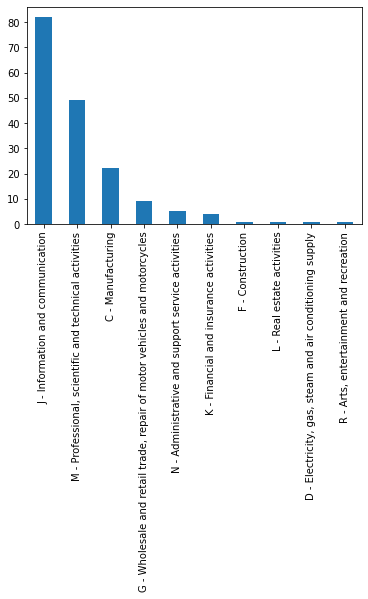

In [119]:
startups['NACE'].value_counts().plot(kind='bar')

In [120]:
startups_list = startups[['Entity',                                              
'NIF',                                                 
'Incorporation (t0)',                                   
'Date of first intervention (t1)',                      
'Maximum Reported Investment (in t2)',              
'Total FINOVA',                                   
'N. Investors FINOVA',                              
'Total Increase in SC from 1st intervention (t1)',    
'SC Final Intervention (in t2)',                     
'Total Increase SC (Inv)',                            
'NACE',                                                
'Company not based in PT',                            
'Exit',                                               
'Share Classes',                                       
'Percentage of special class shares', 'N. Investors (t2)']]                                                

In [121]:
startups_list.rename(columns={'NIF':'N Contribuinte do Promotor'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
startups_list

,Entity,N Contribuinte do Promotor,Incorporation (t0),Date of first intervention (t1),Maximum Reported Investment (in t2),Total FINOVA,N. Investors FINOVA,Total Increase in SC from 1st intervention (t1),SC Final Intervention (in t2),Total Increase SC (Inv),NACE,Company not based in PT,Exit,Share Classes,Percentage of special class shares,N. Investors (t2)
0,COLLAB - SOLUCOES INFORMATICAS DE COMUNICACAO ...,503476749,2006,2013,NaN,0.0,0.0,11300.0,61300.0,11300.0,J - Information and communication,NaN,NaN,N,0.0000,1.0
1,"RADICAL INNOVATION, LDA",510693792,2013,2013,1000000.0,1000000.0,1.0,10000.0,10000.0,8000.0,N - Administrative and support service activities,NaN,NaN,N - LLC,0.0000,1.0
2,"BRIGHT INNOVATION, LDA",510343856,2012,2012,1500000.0,1500000.0,1.0,25000.0,25000.0,22500.0,N - Administrative and support service activities,NaN,NaN,N - LLC,0.0000,1.0
3,"POWER DATA, LDA",510731651,2013,2013,250000.0,250000.0,1.0,10000.0,10000.0,8000.0,J - Information and communication,NaN,NaN,N - LLC,0.0000,2.0
4,"POWERGRID, LDA",509766358,2011,2011,2450000.0,2450000.0,1.0,450000.0,450000.0,400000.0,J - Information and communication,NaN,NaN,N - LLC,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,"IBERMAROS-EQUIPAMENTOS INDUSTRIAIS, S.A.",502009578,2005,2005,NaN,0.0,0.0,270000.0,305000.0,89600.0,C - Manufacturing,NaN,NaN,Y,0.0209,1.0
176,"CRITICAL MANUFACTURING, S.A.",508904021,2009,2009,NaN,0.0,0.0,496000.0,496000.0,NaN,J - Information and communication,NaN,NaN,N,0.0000,1.0
177,"SMARTWATT - ENERGY SERVICES, S.A.",508367360,2008,2009,NaN,0.0,0.0,49000.0,99000.0,NaN,"M - Professional, scientific and technical act...",NaN,Merger,N,0.0000,2.0
178,"BIOMIMETX,S.A.",510877893,2013,2015,1800000.0,0.0,0.0,53300.0,58300.0,33300.0,"M - Professional, scientific and technical act...",NaN,NaN,Y,0.2450,2.0


In [123]:
startups_list.index = startups_list['N Contribuinte do Promotor']

In [124]:
startups_list =startups_list.drop(['N Contribuinte do Promotor'], axis=1)

In [125]:
startups_list.columns = ['Entity', 
                         'Incorporation_t0', 
                         'Date_of_first_intervention_t1',
                         'Maximum_Reported_Investment_in_t2', 
                         'Total_FINOVA',
                         'N_Investors_FINOVA',
       'Total_Increase_in_SC_from_1st_intervention_t1',
       'SC_Final_Intervention_in_t2', 
       'Total_Increase_SC_Inv','NACE',
       'Company_not_based_in_PT','Exit','Share_Classes',
       'Percentage_of_special_class_shares', 'N_Investors_t2']

In [126]:
startups_list.columns

Index(['Entity', 'Incorporation_t0', 'Date_of_first_intervention_t1',
       'Maximum_Reported_Investment_in_t2', 'Total_FINOVA',
       'N_Investors_FINOVA', 'Total_Increase_in_SC_from_1st_intervention_t1',
       'SC_Final_Intervention_in_t2', 'Total_Increase_SC_Inv', 'NACE',
       'Company_not_based_in_PT', 'Exit', 'Share_Classes',
       'Percentage_of_special_class_shares', 'N_Investors_t2'],
      dtype='object')

In [127]:
startups2 = pd.DataFrame(startups_list)

In [128]:
startups3 = startups2[['Incorporation_t0', 'Date_of_first_intervention_t1',
       'Maximum_Reported_Investment_in_t2', 'Total_FINOVA',
       'N_Investors_FINOVA', 'Total_Increase_in_SC_from_1st_intervention_t1',
       'SC_Final_Intervention_in_t2', 'Total_Increase_SC_Inv',
       'Percentage_of_special_class_shares', 'N_Investors_t2']]

In [129]:
from fancyimpute import IterativeImputer
#Multiple Imputation using MICE (Multiple Imputation by Chained Equations)
MICE_imputer = IterativeImputer()
startups_MICE = startups3.copy(deep=True)
startups_MICE.iloc[:, :] = MICE_imputer.fit_transform(startups_MICE)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing 

In [130]:
startups_MICE

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2
N Contribuinte do Promotor,,,,,,,,,,
503476749,2006.0,2013.0,9.253002e+05,0.0,0.0,11300.0,61300.0,11300.000000,0.0000,1.0
510693792,2013.0,2013.0,1.000000e+06,1000000.0,1.0,10000.0,10000.0,8000.000000,0.0000,1.0
510343856,2012.0,2012.0,1.500000e+06,1500000.0,1.0,25000.0,25000.0,22500.000000,0.0000,1.0
510731651,2013.0,2013.0,2.500000e+05,250000.0,1.0,10000.0,10000.0,8000.000000,0.0000,2.0
509766358,2011.0,2011.0,2.450000e+06,2450000.0,1.0,450000.0,450000.0,400000.000000,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...
502009578,2005.0,2005.0,6.209992e+05,0.0,0.0,270000.0,305000.0,89600.000000,0.0209,1.0
508904021,2009.0,2009.0,2.046319e+06,0.0,0.0,496000.0,496000.0,423490.812301,0.0000,1.0
508367360,2008.0,2009.0,3.533669e+06,0.0,0.0,49000.0,99000.0,410069.984174,0.0000,2.0


In [131]:
from fancyimpute import KNN
#k-Neareast Neighbor (kNN) Imputation
knn_imputer = KNN()
startups_knn = startups3.copy(deep=True)
startups_knn.iloc[:, :] = knn_imputer.fit_transform(startups3)

Imputing row 1/175 with 1 missing, elapsed time: 0.013
Imputing row 101/175 with 0 missing, elapsed time: 0.014


In [132]:
startups_knn

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2
N Contribuinte do Promotor,,,,,,,,,,
503476749,2006.0,2013.0,4.688104e+05,0.0,0.0,11300.0,61300.0,11300.000000,0.0000,1.0
510693792,2013.0,2013.0,1.000000e+06,1000000.0,1.0,10000.0,10000.0,8000.000000,0.0000,1.0
510343856,2012.0,2012.0,1.500000e+06,1500000.0,1.0,25000.0,25000.0,22500.000000,0.0000,1.0
510731651,2013.0,2013.0,2.500000e+05,250000.0,1.0,10000.0,10000.0,8000.000000,0.0000,2.0
509766358,2011.0,2011.0,2.450000e+06,2450000.0,1.0,450000.0,450000.0,400000.000000,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...
502009578,2005.0,2005.0,1.462505e+06,0.0,0.0,270000.0,305000.0,89600.000000,0.0209,1.0
508904021,2009.0,2009.0,1.151206e+06,0.0,0.0,496000.0,496000.0,124989.005750,0.0000,1.0
508367360,2008.0,2009.0,2.466208e+06,0.0,0.0,49000.0,99000.0,21302.411920,0.0000,2.0


In [133]:
startups2.columns

Index(['Entity', 'Incorporation_t0', 'Date_of_first_intervention_t1',
       'Maximum_Reported_Investment_in_t2', 'Total_FINOVA',
       'N_Investors_FINOVA', 'Total_Increase_in_SC_from_1st_intervention_t1',
       'SC_Final_Intervention_in_t2', 'Total_Increase_SC_Inv', 'NACE',
       'Company_not_based_in_PT', 'Exit', 'Share_Classes',
       'Percentage_of_special_class_shares', 'N_Investors_t2'],
      dtype='object')

In [134]:
startups4 =  startups2[['NACE', 'Company_not_based_in_PT', 'Exit', 'Share_Classes']]

In [135]:
startups4

,NACE,Company_not_based_in_PT,Exit,Share_Classes
N Contribuinte do Promotor,,,,
503476749,J - Information and communication,NaN,NaN,N
510693792,N - Administrative and support service activities,NaN,NaN,N - LLC
510343856,N - Administrative and support service activities,NaN,NaN,N - LLC
510731651,J - Information and communication,NaN,NaN,N - LLC
509766358,J - Information and communication,NaN,NaN,N - LLC
...,...,...,...,...
502009578,C - Manufacturing,NaN,NaN,Y
508904021,J - Information and communication,NaN,NaN,N
508367360,"M - Professional, scientific and technical act...",NaN,Merger,N


In [136]:
Final_startups = pd.merge(startups_knn,startups4, on='N Contribuinte do Promotor')

In [137]:
Final_startups 

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2,NACE,Company_not_based_in_PT,Exit,Share_Classes
N Contribuinte do Promotor,,,,,,,,,,,,,,
503476749,2006.0,2013.0,4.688104e+05,0.0,0.0,11300.0,61300.0,11300.000000,0.0000,1.0,J - Information and communication,NaN,NaN,N
510693792,2013.0,2013.0,1.000000e+06,1000000.0,1.0,10000.0,10000.0,8000.000000,0.0000,1.0,N - Administrative and support service activities,NaN,NaN,N - LLC
510343856,2012.0,2012.0,1.500000e+06,1500000.0,1.0,25000.0,25000.0,22500.000000,0.0000,1.0,N - Administrative and support service activities,NaN,NaN,N - LLC
510731651,2013.0,2013.0,2.500000e+05,250000.0,1.0,10000.0,10000.0,8000.000000,0.0000,2.0,J - Information and communication,NaN,NaN,N - LLC
509766358,2011.0,2011.0,2.450000e+06,2450000.0,1.0,450000.0,450000.0,400000.000000,0.0000,1.0,J - Information and communication,NaN,NaN,N - LLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502009578,2005.0,2005.0,1.462505e+06,0.0,0.0,270000.0,305000.0,89600.000000,0.0209,1.0,C - Manufacturing,NaN,NaN,Y
508904021,2009.0,2009.0,1.151206e+06,0.0,0.0,496000.0,496000.0,124989.005750,0.0000,1.0,J - Information and communication,NaN,NaN,N
508367360,2008.0,2009.0,2.466208e+06,0.0,0.0,49000.0,99000.0,21302.411920,0.0000,2.0,"M - Professional, scientific and technical act...",NaN,Merger,N


In [138]:
Final_startups['NACE'] = Final_startups['NACE'].fillna('NA')
Final_startups['Company_not_based_in_PT'] = Final_startups['Company_not_based_in_PT'].fillna('NA')  
Final_startups['Exit'] = Final_startups['Exit'].fillna('NA') 
Final_startups['Private_VC_Number'] = Final_startups['N_Investors_t2'] - Final_startups['N_Investors_FINOVA'] 
Final_startups['Private_VC_Investment'] = Final_startups['Maximum_Reported_Investment_in_t2'] - Final_startups['Total_FINOVA'] 

In [139]:
Final_startups['Private_VC_Number'] = Final_startups['Private_VC_Number'].apply(lambda x: 0 if x <= 0 else x)

In [140]:
Final_startups['Private_VC_Investment'] = Final_startups['Private_VC_Investment'].apply(lambda x: 0 if x <= 0 else x)

In [141]:
Final_startups['Private_VC_Investment'].describe()

count    1.750000e+02
mean     1.322812e+06
std      5.410270e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.035000e+05
max      5.960000e+07
Name: Private_VC_Investment, dtype: float64

In [142]:
Final_startups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 503476749 to 513350152
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Incorporation_t0                               175 non-null    float64
 1   Date_of_first_intervention_t1                  175 non-null    float64
 2   Maximum_Reported_Investment_in_t2              175 non-null    float64
 3   Total_FINOVA                                   175 non-null    float64
 4   N_Investors_FINOVA                             175 non-null    float64
 5   Total_Increase_in_SC_from_1st_intervention_t1  175 non-null    float64
 6   SC_Final_Intervention_in_t2                    175 non-null    float64
 7   Total_Increase_SC_Inv                          175 non-null    float64
 8   Percentage_of_special_class_shares             175 non-null    float64
 9   N_Investors_t2                          

## Merge Funding 

In [143]:
#Final_table_frames = [QREN_result,IPR_result, startups2]
Final_table = pd.merge(QREN_result,IPR_result, on='N Contribuinte do Promotor')

In [144]:
Final_table

,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento_Elegivel_Total,QREN_Sector,QREN_CAE_Rev3,QREN_Instrumento,QREN_Concelho,QREN_Regiao,QREN_Data_de_Aprovacao,INPI_NICE_N,INPI_modalidade_N,INPI_modalidade_Moda,INPI_NICE_moda,INPI_dt_ini_vigencia,INPI_Patents_ipc,INPI_Patents_ipc_count,INPI-Patents_moda_mode,INPI_Patents_date,INPI_Design_moda,INPI_Design_moda_count,INPI_Design_fase_actual,INPI_Design_date
N Contribuinte do Promotor,,,,,,,,,,,,,,,,,,,,,
100256538,1,33101,Comercio,47740 - Comercio a retalho de produtos medicos...,Sistema de Incentivos de Apoio Local a Microem...,Braganca,Norte,2013-12-23,10.0,10.0,National Trademark,33,2006-06-27,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
101653069,1,13300,Turismo,55202 - Turismo no espaco rural,Sistema de Incentivos de Apoio Local a Microem...,Viana do Castelo,Norte,2013-08-28,1.0,1.0,National Trademark,43,2010-07-09,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
106320750,2,314605,Comercio,46341 - Comercio por grosso de bebidas alcoolicas,SI Qualificacao PME/Projectos Individuais e de...,Santa Marta de Penaguiao,Norte,2009-11-12,20.0,20.0,National Trademark,33,2006-11-15,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
107951819,1,36000,Industria,11021 - Producao de vinhos comuns e licorosos,SI Qualificacao PME/Projectos Individuais e de...,evora,Alentejo,2012-10-17,11.0,11.0,National Trademark,33,2007-04-18,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
108425304,1,18600,Comercio,47910 - Comercio a retalho por correspondencia...,SI Qualificacao PME/Vale Inovacao,Porto,Norte,2013-08-28,1.0,1.0,National Trademark,14,2013-05-13,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513244930,1,245995,Servicos,62010 - Actividades de programacao informatica,I&DT Empresas/Projectos em Co-promocao,Multi-Concelhos,Multi-Regioes,2014-01-22,2.0,2.0,National Trademark,42,2009-04-21,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
513246690,8,3587166,Servicos,71120 - Actividades de engenharia e tecnicas a...,I&DT Empresas/Projectos em Co-promocao,Coimbra,Centro,2008-06-20,7.0,7.0,National Trademark,09 38 42,2010-01-29,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
513606130,1,665297,Servicos,"74900 - Outras actividades de consultoria, cie...",I&DT Empresas/Projectos em Co-promocao,Multi-Concelhos,Lisboa,2013-02-15,5.0,5.0,National Trademark,35 39 40 42,2015-08-04,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT


In [145]:
Final_table = Final_startups.join(Final_table)

In [146]:
Final_table

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2,NACE,Company_not_based_in_PT,Exit,Share_Classes,Private_VC_Number,Private_VC_Investment,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento_Elegivel_Total,QREN_Sector,QREN_CAE_Rev3,QREN_Instrumento,QREN_Concelho,QREN_Regiao,QREN_Data_de_Aprovacao,INPI_NICE_N,INPI_modalidade_N,INPI_modalidade_Moda,INPI_NICE_moda,INPI_dt_ini_vigencia,INPI_Patents_ipc,INPI_Patents_ipc_count,INPI-Patents_moda_mode,INPI_Patents_date,INPI_Design_moda,INPI_Design_moda_count,INPI_Design_fase_actual,INPI_Design_date
N Contribuinte do Promotor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
503476749,2006.0,2013.0,4.688104e+05,0.0,0.0,11300.0,61300.0,11300.000000,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,4.688104e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
510693792,2013.0,2013.0,1.000000e+06,1000000.0,1.0,10000.0,10000.0,8000.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
510343856,2012.0,2012.0,1.500000e+06,1500000.0,1.0,25000.0,25000.0,22500.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
510731651,2013.0,2013.0,2.500000e+05,250000.0,1.0,10000.0,10000.0,8000.000000,0.0000,2.0,J - Information and communication,NA,NA,N - LLC,1.0,0.000000e+00,1.0,879823.0,Servicos,62010 - Actividades de programacao informatica,I&DT Empresas/Projectos em Co-promocao,Multi-Concelhos,Multi-Regioes,2014-05-20,2.0,2.0,Logotype,NOT APPLICABLE,2015-11-27,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
509766358,2011.0,2011.0,2.450000e+06,2450000.0,1.0,450000.0,450000.0,400000.000000,0.0000,1.0,J - Information and communication,NA,NA,N - LLC,0.0,0.000000e+00,1.0,406265.0,Servicos,62010 - Actividades de programacao informatica,SI Qualificacao PME/Projectos Individuais e de...,Torres Vedras,Centro,2013-02-08,1.0,1.0,Logotype,NOT APPLICABLE,2015-02-03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502009578,2005.0,2005.0,1.462505e+06,0.0,0.0,270000.0,305000.0,89600.000000,0.0209,1.0,C - Manufacturing,NA,NA,Y,1.0,1.462505e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
508904021,2009.0,2009.0,1.151206e+06,0.0,0.0,496000.0,496000.0,124989.005750,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,1.151206e+06,5.0,4907440.0,Servicos,58290 - Edicao de outros programas informaticos,SI Qualificacao PME/Projectos Individuais e de...,Maia,Norte,2009-07-08,2.0,2.0,National Trademark,09 42,2009-11-23,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
508367360,2008.0,2009.0,2.466208e+06,0.0,0.0,49000.0,99000.0,21302.411920,0.0000,2.0,"M - Professional, scientific and technical act...",NA,Merger,N,2.0,2.466208e+06,4.0,782763.0,Servicos,71120 - Actividades de engenharia e tecnicas a...,I&DT Empresas/Projectos Individuais,Porto,Norte,2008-11-27,2.0,2.0,Logotype,35,2009-02-17,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT


In [147]:
Final_table.columns

Index(['Incorporation_t0', 'Date_of_first_intervention_t1',
       'Maximum_Reported_Investment_in_t2', 'Total_FINOVA',
       'N_Investors_FINOVA', 'Total_Increase_in_SC_from_1st_intervention_t1',
       'SC_Final_Intervention_in_t2', 'Total_Increase_SC_Inv',
       'Percentage_of_special_class_shares', 'N_Investors_t2', 'NACE',
       'Company_not_based_in_PT', 'Exit', 'Share_Classes', 'Private_VC_Number',
       'Private_VC_Investment', 'QREN_Investimento_Elegivel_N_Operações',
       'QREN_Investimento_Elegivel_Total', 'QREN_Sector', 'QREN_CAE_Rev3',
       'QREN_Instrumento', 'QREN_Concelho', 'QREN_Regiao',
       'QREN_Data_de_Aprovacao', 'INPI_NICE_N', 'INPI_modalidade_N',
       'INPI_modalidade_Moda', 'INPI_NICE_moda', 'INPI_dt_ini_vigencia',
       'INPI_Patents_ipc', 'INPI_Patents_ipc_count', 'INPI-Patents_moda_mode',
       'INPI_Patents_date', 'INPI_Design_moda', 'INPI_Design_moda_count',
       'INPI_Design_fase_actual', 'INPI_Design_date'],
      dtype='object')

In [148]:
Final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 503476749 to 513350152
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Incorporation_t0                               175 non-null    float64       
 1   Date_of_first_intervention_t1                  175 non-null    float64       
 2   Maximum_Reported_Investment_in_t2              175 non-null    float64       
 3   Total_FINOVA                                   175 non-null    float64       
 4   N_Investors_FINOVA                             175 non-null    float64       
 5   Total_Increase_in_SC_from_1st_intervention_t1  175 non-null    float64       
 6   SC_Final_Intervention_in_t2                    175 non-null    float64       
 7   Total_Increase_SC_Inv                          175 non-null    float64       
 8   Percentage_of_special_class_shares            

In [149]:
Final_table['QREN_Investimento_Elegivel_N_Operações'] = Final_table['QREN_Investimento_Elegivel_N_Operações'].fillna(0)
Final_table['QREN_Investimento_Elegivel_Total'] = Final_table['QREN_Investimento_Elegivel_Total'].fillna(0)
Final_table['QREN_Sector'] = Final_table['QREN_Sector'].fillna(0)
Final_table['QREN_CAE_Rev3'] = Final_table['QREN_CAE_Rev3'].fillna(0)
Final_table['QREN_Instrumento'] = Final_table['QREN_Instrumento'].fillna('NA')
Final_table['QREN_Concelho'] = Final_table['QREN_Concelho'].fillna(0)
Final_table['QREN_Regiao'] =Final_table['QREN_Regiao'].fillna(0)
Final_table['QREN_Data_de_Aprovacao'] = Final_table['QREN_Data_de_Aprovacao'].fillna(0)
Final_table['INPI_NICE_N'] = Final_table['INPI_NICE_N'].fillna(0)
Final_table['INPI_modalidade_N'] = Final_table['INPI_modalidade_N'].fillna(0)
Final_table['INPI_modalidade_Moda'] = Final_table['INPI_modalidade_Moda'].fillna(0)
Final_table['INPI_NICE_moda'] = Final_table['INPI_NICE_moda'].fillna(0)
Final_table['INPI_dt_ini_vigencia'] =Final_table['INPI_dt_ini_vigencia'].fillna(0)
Final_table['INPI_Patents_ipc'] = Final_table['INPI_Patents_ipc'].fillna(0)
Final_table['INPI_Patents_ipc_count'] = Final_table['INPI_Patents_ipc_count'].fillna(0)
Final_table['INPI-Patents_moda_mode'] = Final_table['INPI-Patents_moda_mode'].fillna(0)
Final_table['INPI_Patents_date'] = Final_table['INPI_Patents_date'].fillna(0)
Final_table['INPI_Design_moda'] =Final_table['INPI_Design_moda'].fillna(0)
Final_table['INPI_Design_moda_count'] = Final_table['INPI_Design_moda_count'].fillna(0)
Final_table['INPI_Design_fase_actual'] = Final_table['INPI_Design_fase_actual'].fillna(0)
Final_table['INPI_Design_date'] = Final_table['INPI_Design_date'].fillna(0)

In [150]:
Final_table['Company_not_based_in_PT'].value_counts()

NA                                    169
VENIAM, INC., 7/20/2012, DE USA         1
D ORBIT S.R.L., Italy                   1
PRINCIPLE POWER, INC., NV USA 2007      1
DE & MA USA                             1
UNBABEL, INC.2013, DELAWARE (USA)       1
DE, USA                                 1
Name: Company_not_based_in_PT, dtype: int64

In [151]:
Final_table['IPR'] = Final_table.loc[:,['INPI_NICE_N', 'INPI_Patents_ipc_count' ,'INPI_Design_moda_count']].sum(axis=1)

In [152]:
Final_table['IPR_P'] = Final_table['IPR'].apply(lambda x: 1 if x > 1 else 0)

In [579]:
Final_table['IPR_P']

N Contribuinte do Promotor
503476749    0
510693792    0
510343856    0
510731651    1
509766358    0
            ..
502009578    0
508904021    1
508367360    1
510877893    0
513350152    0
Name: IPR_P, Length: 175, dtype: int64

In [153]:
Final_table['FINOVA'] = Final_table['Total_FINOVA'].apply(lambda x: 1 if x > 1 else 0)
Final_table['QREN'] = Final_table['QREN_Investimento_Elegivel_Total'].apply(lambda x: 1 if x > 1 else 0)

In [154]:
Final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 503476749 to 513350152
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Incorporation_t0                               175 non-null    float64
 1   Date_of_first_intervention_t1                  175 non-null    float64
 2   Maximum_Reported_Investment_in_t2              175 non-null    float64
 3   Total_FINOVA                                   175 non-null    float64
 4   N_Investors_FINOVA                             175 non-null    float64
 5   Total_Increase_in_SC_from_1st_intervention_t1  175 non-null    float64
 6   SC_Final_Intervention_in_t2                    175 non-null    float64
 7   Total_Increase_SC_Inv                          175 non-null    float64
 8   Percentage_of_special_class_shares             175 non-null    float64
 9   N_Investors_t2                          

In [155]:
Final_table['IPR'].value_counts()

0.0     128
2.0      18
1.0      13
4.0       4
6.0       3
8.0       3
3.0       2
5.0       1
12.0      1
10.0      1
7.0       1
Name: IPR, dtype: int64

In [156]:
Final_table['IPR_P'].value_counts()


0    141
1     34
Name: IPR_P, dtype: int64

In [157]:
Final_table['INPI_NICE_moda'].value_counts()

0                                   130
42                                    7
09                                    4
09 42                                 3
35                                    2
10                                    2
NOT APPLICABLE                        2
11                                    2
09 10 38                              1
01 05 10                              1
09 42 44                              1
38                                    1
09 35 38 39 41 42                     1
09 16 21 25 28 29 30 31 32 35 41      1
41 44                                 1
09 37 42                              1
35 41 42                              1
09 12 37 41 42                        1
02                                    1
07 11 37 42                           1
35 39 41                              1
19                                    1
28                                    1
42 45                                 1
35 39                                 1


In [158]:
Final_table['INPI_NICE_N'].value_counts()

0.0     130
2.0      17
1.0      13
4.0       5
8.0       3
3.0       2
6.0       2
12.0      1
10.0      1
7.0       1
Name: INPI_NICE_N, dtype: int64

In [159]:
Final_table['INPI_Patents_ipc'].value_counts()

0                       172
B01F 5/00 (1968.09)       1
C09D 11/30 (2014.01)      1
A23J 1/12 (2006.01)       1
Name: INPI_Patents_ipc, dtype: int64

### Encoding Categorical Values

In [160]:
Final_table_cat = Final_table.select_dtypes(include=['object']).copy()

In [161]:
Final_table_cat['QREN_Sector'].value_counts()

0            128
Servicos      34
Industria     10
Comercio       2
Turismo        1
Name: QREN_Sector, dtype: int64

In [162]:
Final_table_cat['QREN_Sector'] = Final_table['QREN_Sector'].astype('category')
Final_table_cat['QREN_CAE_Rev3'] = Final_table['QREN_CAE_Rev3'].astype('category')

In [163]:
Final_table_cat['QREN_Sector']

N Contribuinte do Promotor
503476749           0
510693792           0
510343856           0
510731651    Servicos
509766358    Servicos
               ...   
502009578           0
508904021    Servicos
508367360    Servicos
510877893           0
513350152           0
Name: QREN_Sector, Length: 175, dtype: category
Categories (5, object): [0, Comercio, Industria, Servicos, Turismo]

In [164]:
Final_table_cat['QREN_CAE_Rev3']

N Contribuinte do Promotor
503476749                                                    0
510693792                                                    0
510343856                                                    0
510731651       62010 - Actividades de programacao informatica
509766358       62010 - Actividades de programacao informatica
                                   ...                        
502009578                                                    0
508904021      58290 - Edicao de outros programas informaticos
508367360    71120 - Actividades de engenharia e tecnicas a...
510877893                                                    0
513350152                                                    0
Name: QREN_CAE_Rev3, Length: 175, dtype: category
Categories (28, object): [0, 10860 - Fabricacao de alimentos homogeneizados...,
                          20120 - Fabricacao de corantes e pigmentos, 20130 - Fabricacao de outros produtos quimicos..., ...,
                        

In [165]:
#assign the encoded variable to a new column using the cat.codes accessor:
Final_table_cat['QREN_Sector Codes'] = Final_table_cat['QREN_Sector'].cat.codes

In [166]:
Final_table_cat['QREN_Sector'].value_counts()

0            128
Servicos      34
Industria     10
Comercio       2
Turismo        1
Name: QREN_Sector, dtype: int64

In [167]:
Final_table

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2,NACE,Company_not_based_in_PT,Exit,Share_Classes,Private_VC_Number,Private_VC_Investment,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento_Elegivel_Total,QREN_Sector,QREN_CAE_Rev3,QREN_Instrumento,QREN_Concelho,QREN_Regiao,QREN_Data_de_Aprovacao,INPI_NICE_N,INPI_modalidade_N,INPI_modalidade_Moda,INPI_NICE_moda,INPI_dt_ini_vigencia,INPI_Patents_ipc,INPI_Patents_ipc_count,INPI-Patents_moda_mode,INPI_Patents_date,INPI_Design_moda,INPI_Design_moda_count,INPI_Design_fase_actual,INPI_Design_date,IPR,IPR_P,FINOVA,QREN
N Contribuinte do Promotor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
503476749,2006.0,2013.0,4.688104e+05,0.0,0.0,11300.0,61300.0,11300.000000,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,4.688104e+05,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0
510693792,2013.0,2013.0,1.000000e+06,1000000.0,1.0,10000.0,10000.0,8000.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,1,0
510343856,2012.0,2012.0,1.500000e+06,1500000.0,1.0,25000.0,25000.0,22500.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,1,0
510731651,2013.0,2013.0,2.500000e+05,250000.0,1.0,10000.0,10000.0,8000.000000,0.0000,2.0,J - Information and communication,NA,NA,N - LLC,1.0,0.000000e+00,1.0,879823.0,Servicos,62010 - Actividades de programacao informatica,I&DT Empresas/Projectos em Co-promocao,Multi-Concelhos,Multi-Regioes,2014-05-20 00:00:00,2.0,2.0,Logotype,NOT APPLICABLE,2015-11-27 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,1,1
509766358,2011.0,2011.0,2.450000e+06,2450000.0,1.0,450000.0,450000.0,400000.000000,0.0000,1.0,J - Information and communication,NA,NA,N - LLC,0.0,0.000000e+00,1.0,406265.0,Servicos,62010 - Actividades de programacao informatica,SI Qualificacao PME/Projectos Individuais e de...,Torres Vedras,Centro,2013-02-08 00:00:00,1.0,1.0,Logotype,NOT APPLICABLE,2015-02-03 00:00:00,0,0.0,0,0,0.0,0,0,0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502009578,2005.0,2005.0,1.462505e+06,0.0,0.0,270000.0,305000.0,89600.000000,0.0209,1.0,C - Manufacturing,NA,NA,Y,1.0,1.462505e+06,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0
508904021,2009.0,2009.0,1.151206e+06,0.0,0.0,496000.0,496000.0,124989.005750,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,1.151206e+06,5.0,4907440.0,Servicos,58290 - Edicao de outros programas informaticos,SI Qualificacao PME/Projectos Individuais e de...,Maia,Norte,2009-07-08 00:00:00,2.0,2.0,National Trademark,09 42,2009-11-23 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,0,1
508367360,2008.0,2009.0,2.466208e+06,0.0,0.0,49000.0,99000.0,21302.411920,0.0000,2.0,"M - Professional, scientific and technical act...",NA,Merger,N,2.0,2.466208e+06,4.0,782763.0,Servicos,71120 - Actividades de engenharia e tecnicas a...,I&DT Empresas/Projectos Individuais,Porto,Norte,2008-11-27 00:00:00,2.0,2.0,Logotype,35,2009-02-17 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,0,1


In [168]:
Final_table.describe()

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2,Private_VC_Number,Private_VC_Investment,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento_Elegivel_Total,INPI_NICE_N,INPI_modalidade_N,INPI_Patents_ipc_count,INPI_Design_moda,IPR,IPR_P,FINOVA,QREN
count,175.000000,175.000000,1.750000e+02,1.750000e+02,175.000000,1.750000e+02,1.750000e+02,1.750000e+02,175.000000,175.00000,175.000000,1.750000e+02,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2010.331429,2012.182857,2.014029e+06,6.939029e+05,0.977143,3.602629e+05,6.176075e+05,1.613025e+05,0.202881,2.12000,1.142857,1.322812e+06,0.565714,3.296718e+05,0.788571,0.788571,0.051429,0.011429,0.840000,0.194286,0.691429,0.268571
std,3.961581,2.665390,5.336575e+06,9.558077e+05,0.915726,9.326555e+05,1.810657e+06,3.366892e+05,0.240484,1.39885,1.354916,5.410270e+06,1.167063,1.599506e+06,1.898543,1.898543,0.432429,0.151186,1.949831,0.396785,0.463229,0.444488
min,1977.000000,2004.000000,3.500000e+04,0.000000e+00,0.000000,0.000000e+00,1.000000e+02,0.000000e+00,0.000000,1.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,2011.000000,4.060000e+05,0.000000e+00,0.000000,4.170000e+04,6.250000e+04,1.958018e+04,0.000000,1.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,2013.000000,9.010000e+05,3.630000e+05,1.000000,7.440000e+04,9.900000e+04,3.924494e+04,0.142000,2.00000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2013.000000,2014.000000,1.642062e+06,1.000000e+06,1.000000,2.075000e+05,4.220000e+05,1.086987e+05,0.349500,3.00000,2.000000,6.035000e+05,1.000000,3.072900e+04,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,2015.000000,2015.000000,5.960000e+07,5.890000e+06,5.000000,7.900000e+06,1.890000e+07,2.890000e+06,1.000000,8.00000,8.000000,5.960000e+07,6.000000,1.956089e+07,12.000000,12.000000,5.000000,2.000000,12.000000,1.000000,1.000000,1.000000


In [169]:
Final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 503476749 to 513350152
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Incorporation_t0                               175 non-null    float64
 1   Date_of_first_intervention_t1                  175 non-null    float64
 2   Maximum_Reported_Investment_in_t2              175 non-null    float64
 3   Total_FINOVA                                   175 non-null    float64
 4   N_Investors_FINOVA                             175 non-null    float64
 5   Total_Increase_in_SC_from_1st_intervention_t1  175 non-null    float64
 6   SC_Final_Intervention_in_t2                    175 non-null    float64
 7   Total_Increase_SC_Inv                          175 non-null    float64
 8   Percentage_of_special_class_shares             175 non-null    float64
 9   N_Investors_t2                          

# Network

In [170]:
import networkx

obj_Final_table = Final_table.copy()
obj_Final_table['NIF'] = obj_Final_table.index

In [171]:
obj_Final_table

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2,NACE,Company_not_based_in_PT,Exit,Share_Classes,Private_VC_Number,Private_VC_Investment,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento_Elegivel_Total,QREN_Sector,QREN_CAE_Rev3,QREN_Instrumento,QREN_Concelho,QREN_Regiao,QREN_Data_de_Aprovacao,INPI_NICE_N,INPI_modalidade_N,INPI_modalidade_Moda,INPI_NICE_moda,INPI_dt_ini_vigencia,INPI_Patents_ipc,INPI_Patents_ipc_count,INPI-Patents_moda_mode,INPI_Patents_date,INPI_Design_moda,INPI_Design_moda_count,INPI_Design_fase_actual,INPI_Design_date,IPR,IPR_P,FINOVA,QREN,NIF
N Contribuinte do Promotor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
503476749,2006.0,2013.0,4.688104e+05,0.0,0.0,11300.0,61300.0,11300.000000,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,4.688104e+05,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,503476749
510693792,2013.0,2013.0,1.000000e+06,1000000.0,1.0,10000.0,10000.0,8000.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,1,0,510693792
510343856,2012.0,2012.0,1.500000e+06,1500000.0,1.0,25000.0,25000.0,22500.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,1,0,510343856
510731651,2013.0,2013.0,2.500000e+05,250000.0,1.0,10000.0,10000.0,8000.000000,0.0000,2.0,J - Information and communication,NA,NA,N - LLC,1.0,0.000000e+00,1.0,879823.0,Servicos,62010 - Actividades de programacao informatica,I&DT Empresas/Projectos em Co-promocao,Multi-Concelhos,Multi-Regioes,2014-05-20 00:00:00,2.0,2.0,Logotype,NOT APPLICABLE,2015-11-27 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,1,1,510731651
509766358,2011.0,2011.0,2.450000e+06,2450000.0,1.0,450000.0,450000.0,400000.000000,0.0000,1.0,J - Information and communication,NA,NA,N - LLC,0.0,0.000000e+00,1.0,406265.0,Servicos,62010 - Actividades de programacao informatica,SI Qualificacao PME/Projectos Individuais e de...,Torres Vedras,Centro,2013-02-08 00:00:00,1.0,1.0,Logotype,NOT APPLICABLE,2015-02-03 00:00:00,0,0.0,0,0,0.0,0,0,0,1.0,0,1,1,509766358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502009578,2005.0,2005.0,1.462505e+06,0.0,0.0,270000.0,305000.0,89600.000000,0.0209,1.0,C - Manufacturing,NA,NA,Y,1.0,1.462505e+06,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,502009578
508904021,2009.0,2009.0,1.151206e+06,0.0,0.0,496000.0,496000.0,124989.005750,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,1.151206e+06,5.0,4907440.0,Servicos,58290 - Edicao de outros programas informaticos,SI Qualificacao PME/Projectos Individuais e de...,Maia,Norte,2009-07-08 00:00:00,2.0,2.0,National Trademark,09 42,2009-11-23 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,0,1,508904021
508367360,2008.0,2009.0,2.466208e+06,0.0,0.0,49000.0,99000.0,21302.411920,0.0000,2.0,"M - Professional, scientific and technical act...",NA,Merger,N,2.0,2.466208e+06,4.0,782763.0,Servicos,71120 - Actividades de engenharia e tecnicas a...,I&DT Empresas/Projectos Individuais,Porto,Norte,2008-11-27 00:00:00,2.0,2.0,Logotype,35,2009-02-17 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,0,1,508367360


In [172]:
obj_Final_table['Venture Capital'] = obj_Final_table['Private_VC_Investment'].apply(lambda x: 'Venture Capital' if x > 1 else 'NA')
obj_Final_table['Public Venture Capital'] = obj_Final_table['Total_FINOVA'].apply(lambda x: 'FINOVA' if x > 1 else 'NA')

In [173]:
obj_Final_table['QREN_Investimento_Elegivel_N_Operações'] = obj_Final_table['QREN_Investimento_Elegivel_N_Operações'].fillna(0)
obj_Final_table['QREN_Investimento_Elegivel_Total'] = obj_Final_table['QREN_Investimento_Elegivel_Total'].fillna(0)


In [174]:
obj_Final_table['QREN_Instrumento'] = obj_Final_table['QREN_Instrumento'].fillna('NA')
obj_Final_table['QREN_Instrumento'].unique()

array(['NA', 'I&DT Empresas/Projectos em Co-promocao',
       'SI Qualificacao PME/Projectos Individuais e de Cooperacao',
       'I&DT Empresas/Projectos Individuais',
       'SI Qualificacao PME/Vale Inovacao',
       'SI Inovacao/Inovacao Produtiva',
       'SI Inovacao/Empreendedorismo Qualificado',
       'Sistema de Incentivos de Apoio Local a Microempresas (SIALM)',
       'Criacao e Reforco de competencias Internas de I&DT/Nucleos de I&DT',
       'I&DT Empresas/Projectos Mobilizadores'], dtype=object)

In [175]:
# Build your graph
G_compete=nx.from_pandas_edgelist(obj_Final_table, 'QREN_Instrumento', 'NIF', ['QREN_Investimento_Elegivel_Total'], create_using=nx.DiGraph)
print (obj_Final_table[obj_Final_table['QREN_Instrumento'].isnull()])
G_compete.edges()

Empty DataFrame
Columns: [Incorporation_t0, Date_of_first_intervention_t1, Maximum_Reported_Investment_in_t2, Total_FINOVA, N_Investors_FINOVA, Total_Increase_in_SC_from_1st_intervention_t1, SC_Final_Intervention_in_t2, Total_Increase_SC_Inv, Percentage_of_special_class_shares, N_Investors_t2, NACE, Company_not_based_in_PT, Exit, Share_Classes, Private_VC_Number, Private_VC_Investment, QREN_Investimento_Elegivel_N_Operações, QREN_Investimento_Elegivel_Total, QREN_Sector, QREN_CAE_Rev3, QREN_Instrumento, QREN_Concelho, QREN_Regiao, QREN_Data_de_Aprovacao, INPI_NICE_N, INPI_modalidade_N, INPI_modalidade_Moda, INPI_NICE_moda, INPI_dt_ini_vigencia, INPI_Patents_ipc, INPI_Patents_ipc_count, INPI-Patents_moda_mode, INPI_Patents_date, INPI_Design_moda, INPI_Design_moda_count, INPI_Design_fase_actual, INPI_Design_date, IPR, IPR_P, FINOVA, QREN, NIF, Venture Capital, Public Venture Capital]
Index: []


OutEdgeView([('NA', 503476749), ('NA', 510693792), ('NA', 510343856), ('NA', 513136444), ('NA', 513231412), ('NA', 510302262), ('NA', 508979366), ('NA', 508771862), ('NA', 508206383), ('NA', 508753902), ('NA', 509229697), ('NA', 502448911), ('NA', 509034080), ('NA', 509928471), ('NA', 509739490), ('NA', 509985394), ('NA', 513037470), ('NA', 510575994), ('NA', 509820638), ('NA', 509845061), ('NA', 510730370), ('NA', 510742971), ('NA', 510781322), ('NA', 510803598), ('NA', 509967400), ('NA', 510177026), ('NA', 510361803), ('NA', 510993834), ('NA', 510077072), ('NA', 510571514), ('NA', 510753884), ('NA', 510788815), ('NA', 513002901), ('NA', 513061690), ('NA', 513249141), ('NA', 510343350), ('NA', 507586557), ('NA', 509293077), ('NA', 509655300), ('NA', 509890180), ('NA', 509987184), ('NA', 513002111), ('NA', 509594107), ('NA', 509895948), ('NA', 509923275), ('NA', 510091083), ('NA', 510695833), ('NA', 510942571), ('NA', 509992544), ('NA', 509066569), ('NA', 510354050), ('NA', 508077036),

In [176]:
G_compete.nodes()
list_to_remove = ['NA']
G_compete.remove_nodes_from(list_to_remove)
G_compete.nodes()

NodeView((503476749, 510693792, 510343856, 'I&DT Empresas/Projectos em Co-promocao', 510731651, 'SI Qualificacao PME/Projectos Individuais e de Cooperacao', 509766358, 510465978, 513136444, 513231412, 510302262, 508979366, 508771862, 508206383, 508753902, 'I&DT Empresas/Projectos Individuais', 509756638, 500695679, 509229697, 502448911, 506300072, 509034080, 509928471, 509739490, 509985394, 509061907, 'SI Qualificacao PME/Vale Inovacao', 510434126, 513037470, 'SI Inovacao/Inovacao Produtiva', 509667694, 510575994, 508457467, 509820638, 509845061, 510730370, 510742971, 510781322, 510803598, 509967400, 510177026, 510361803, 510993834, 510077072, 510571514, 510753884, 510788815, 513002901, 513061690, 513249141, 508339855, 508805759, 509961320, 510343350, 510447147, 507586557, 509293077, 510642926, 509655300, 509822070, 509890180, 509984568, 509987184, 513002111, 509594107, 509895948, 509923275, 510091083, 510695833, 510942571, 509992544, 'SI Inovacao/Empreendedorismo Qualificado', 5102523

In [177]:
G_compete.edges()

OutEdgeView([('I&DT Empresas/Projectos em Co-promocao', 510731651), ('I&DT Empresas/Projectos em Co-promocao', 508339855), ('I&DT Empresas/Projectos em Co-promocao', 507439384), ('I&DT Empresas/Projectos em Co-promocao', 504901575), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 509766358), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 510465978), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 500695679), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 506300072), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 509061907), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 508457467), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 508805759), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 509961320), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 510642926), ('SI Qualificacao PME/Projectos Individuais e de Cooperacao', 509822070), ('SI Qualificacao PME/Proje

In [178]:
G_compete.nodes()

NodeView((503476749, 510693792, 510343856, 'I&DT Empresas/Projectos em Co-promocao', 510731651, 'SI Qualificacao PME/Projectos Individuais e de Cooperacao', 509766358, 510465978, 513136444, 513231412, 510302262, 508979366, 508771862, 508206383, 508753902, 'I&DT Empresas/Projectos Individuais', 509756638, 500695679, 509229697, 502448911, 506300072, 509034080, 509928471, 509739490, 509985394, 509061907, 'SI Qualificacao PME/Vale Inovacao', 510434126, 513037470, 'SI Inovacao/Inovacao Produtiva', 509667694, 510575994, 508457467, 509820638, 509845061, 510730370, 510742971, 510781322, 510803598, 509967400, 510177026, 510361803, 510993834, 510077072, 510571514, 510753884, 510788815, 513002901, 513061690, 513249141, 508339855, 508805759, 509961320, 510343350, 510447147, 507586557, 509293077, 510642926, 509655300, 509822070, 509890180, 509984568, 509987184, 513002111, 509594107, 509895948, 509923275, 510091083, 510695833, 510942571, 509992544, 'SI Inovacao/Empreendedorismo Qualificado', 5102523

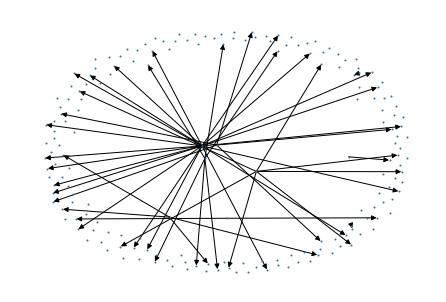

In [179]:
nx.draw(G_compete, with_labels=False,node_size=1)
pos = nx.spring_layout(G_compete)

In [180]:
print(nx.info(G_compete))

Name: 
Type: DiGraph
Number of nodes: 184
Number of edges: 47
Average in degree:   0.2554
Average out degree:   0.2554


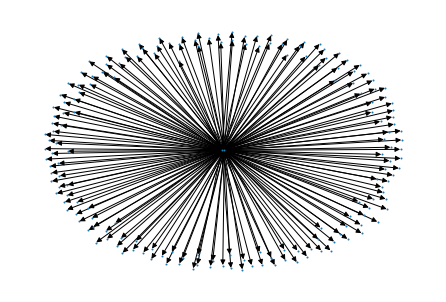

In [181]:
G_publicVC = nx.from_pandas_edgelist(obj_Final_table, 'Public Venture Capital', 'NIF' ,'Total_FINOVA', create_using=nx.DiGraph)
nx.draw(G_publicVC, with_labels=False,node_size=1)

In [182]:
list_to_remove = ['NA']
G_publicVC.remove_nodes_from(list_to_remove)
G_publicVC.nodes()

NodeView((503476749, 'FINOVA', 510693792, 510343856, 510731651, 509766358, 510465978, 513136444, 513231412, 510302262, 508979366, 508771862, 508206383, 508753902, 509756638, 500695679, 509229697, 502448911, 506300072, 509034080, 509928471, 509739490, 509985394, 509061907, 510434126, 513037470, 509667694, 510575994, 508457467, 509820638, 509845061, 510730370, 510742971, 510781322, 510803598, 509967400, 510177026, 510361803, 510993834, 510077072, 510571514, 510753884, 510788815, 513002901, 513061690, 513249141, 508339855, 508805759, 509961320, 510343350, 510447147, 507586557, 509293077, 510642926, 509655300, 509822070, 509890180, 509984568, 509987184, 513002111, 509594107, 509895948, 509923275, 510091083, 510695833, 510942571, 509992544, 510252362, 509221785, 509687040, 509720765, 510257127, 509280285, 509066569, 510354050, 508077036, 510815120, 508268516, 510861679, 508991390, 510445276, 510603556, 510646778, 510804519, 510824625, 507896068, 507798325, 510740480, 513233989, 510064256, 5

In [183]:
G_publicVC.edges()

OutEdgeView([('FINOVA', 510693792), ('FINOVA', 510343856), ('FINOVA', 510731651), ('FINOVA', 509766358), ('FINOVA', 510465978), ('FINOVA', 513136444), ('FINOVA', 513231412), ('FINOVA', 510302262), ('FINOVA', 508979366), ('FINOVA', 508771862), ('FINOVA', 508206383), ('FINOVA', 508753902), ('FINOVA', 509756638), ('FINOVA', 500695679), ('FINOVA', 509229697), ('FINOVA', 502448911), ('FINOVA', 506300072), ('FINOVA', 509034080), ('FINOVA', 509928471), ('FINOVA', 509739490), ('FINOVA', 509985394), ('FINOVA', 509061907), ('FINOVA', 510434126), ('FINOVA', 513037470), ('FINOVA', 509667694), ('FINOVA', 510575994), ('FINOVA', 508457467), ('FINOVA', 509820638), ('FINOVA', 509845061), ('FINOVA', 510730370), ('FINOVA', 510742971), ('FINOVA', 510781322), ('FINOVA', 510803598), ('FINOVA', 509967400), ('FINOVA', 510177026), ('FINOVA', 510361803), ('FINOVA', 510993834), ('FINOVA', 510077072), ('FINOVA', 510571514), ('FINOVA', 510753884), ('FINOVA', 510788815), ('FINOVA', 513002901), ('FINOVA', 513061690)

In [184]:
print(nx.info(G_publicVC))

Name: 
Type: DiGraph
Number of nodes: 176
Number of edges: 121
Average in degree:   0.6875
Average out degree:   0.6875


In [185]:
G_VentureCapital=nx.from_pandas_edgelist(obj_Final_table, 'Venture Capital', 'NIF' , 'Private_VC_Investment', create_using=nx.DiGraph)

In [186]:
list_to_remove = ['NA']
G_VentureCapital.remove_nodes_from(list_to_remove)
G_VentureCapital.nodes()

NodeView(('Venture Capital', 503476749, 510693792, 510343856, 510731651, 509766358, 510465978, 513136444, 513231412, 510302262, 508979366, 508771862, 508206383, 508753902, 509756638, 500695679, 509229697, 502448911, 506300072, 509034080, 509928471, 509739490, 509985394, 509061907, 510434126, 513037470, 509667694, 510575994, 508457467, 509820638, 509845061, 510730370, 510742971, 510781322, 510803598, 509967400, 510177026, 510361803, 510993834, 510077072, 510571514, 510753884, 510788815, 513002901, 513061690, 513249141, 508339855, 508805759, 509961320, 510343350, 510447147, 507586557, 509293077, 510642926, 509655300, 509822070, 509890180, 509984568, 509987184, 513002111, 509594107, 509895948, 509923275, 510091083, 510695833, 510942571, 509992544, 510252362, 509221785, 509687040, 509720765, 510257127, 509280285, 509066569, 510354050, 508077036, 510815120, 508268516, 510861679, 508991390, 510445276, 510603556, 510646778, 510804519, 510824625, 507896068, 507798325, 510740480, 513233989, 510

In [187]:
print(nx.info(G_VentureCapital))

Name: 
Type: DiGraph
Number of nodes: 176
Number of edges: 78
Average in degree:   0.4432
Average out degree:   0.4432


In [188]:
G_VentureCapital.edges()

OutEdgeView([('Venture Capital', 503476749), ('Venture Capital', 508979366), ('Venture Capital', 513037470), ('Venture Capital', 510730370), ('Venture Capital', 510781322), ('Venture Capital', 510993834), ('Venture Capital', 513002901), ('Venture Capital', 509822070), ('Venture Capital', 509984568), ('Venture Capital', 509987184), ('Venture Capital', 513002111), ('Venture Capital', 509923275), ('Venture Capital', 510942571), ('Venture Capital', 509066569), ('Venture Capital', 510354050), ('Venture Capital', 510815120), ('Venture Capital', 508991390), ('Venture Capital', 510445276), ('Venture Capital', 510646778), ('Venture Capital', 510824625), ('Venture Capital', 507896068), ('Venture Capital', 510740898), ('Venture Capital', 513553142), ('Venture Capital', 510098371), ('Venture Capital', 509955061), ('Venture Capital', 510985530), ('Venture Capital', 508482917), ('Venture Capital', 508977754), ('Venture Capital', 510781845), ('Venture Capital', 505298503), ('Venture Capital', 5061316

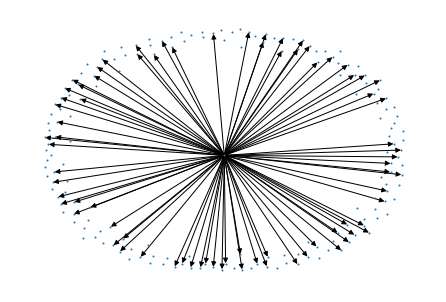

In [189]:
nx.draw(G_VentureCapital, with_labels=False,node_size=1)

(Intersection, union, sum) The intersection A  B of two subspaces A and B in a vector space V consists of all vectors that belong to both A and B

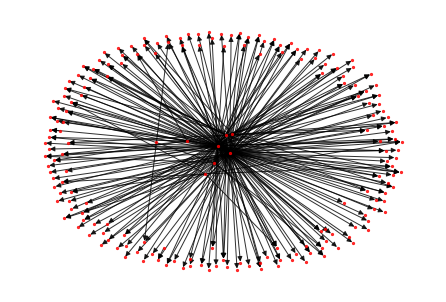

In [190]:
#from netwtokx import networkx.algorithms.operators.binary.compose
from networkx.algorithms import compose

# combine graphs identifying nodes common to both
G_Union = compose(G_compete,G_VentureCapital)         

G_Union2 = compose(G_Union,G_publicVC)

from networkx.algorithms import union
nx.draw(G_Union2, node_color='r', node_size=5, alpha=0.8)

In [191]:
print(nx.info(G_Union2))

Name: 
Type: DiGraph
Number of nodes: 186
Number of edges: 246
Average in degree:   1.3226
Average out degree:   1.3226


In [192]:
nx.density(G_Union2) # Average edge density of the Graphs

0.0071490845684394075

In [193]:
degree_centrality = nx.algorithms.degree_centrality(G_Union2) #RETUN LIST
degree_centrality = pd.DataFrame(list(degree_centrality.items()), columns=['NIF', 'degree_centrality'])
degree_centrality.sort_values(ascending=False, by='degree_centrality')

,NIF,degree_centrality
185,FINOVA,0.654054
184,Venture Capital,0.421622
5,SI Qualificacao PME/Projectos Individuais e de...,0.108108
26,SI Qualificacao PME/Vale Inovacao,0.037838
71,SI Inovacao/Empreendedorismo Qualificado,0.032432
...,...,...
68,510695833,0.005405
67,510091083,0.005405
65,509895948,0.005405
64,509594107,0.005405


In [194]:
a = nx.isolates(G_Union2)
list(a)

[]

In [195]:
in_degree_centrality = nx.algorithms.in_degree_centrality(G_Union2) # remind that this is a dictionary
in_degree_centrality = pd.DataFrame(list(in_degree_centrality.items()), columns=['N Contribuinte do Promotor', 'in_degree_centrality'])
in_degree_centrality.sort_values(by='in_degree_centrality', ascending=False)

,N Contribuinte do Promotor,in_degree_centrality
90,507896068,0.016216
120,510098371,0.016216
84,508991390,0.016216
85,510445276,0.016216
59,509822070,0.016216
...,...,...
29,SI Inovacao/Inovacao Produtiva,0.000000
91,Sistema de Incentivos de Apoio Local a Microem...,0.000000
139,I&DT Empresas/Projectos Mobilizadores,0.000000
71,SI Inovacao/Empreendedorismo Qualificado,0.000000


In [196]:
#etol (float, optional) – Error tolerance used to check convergence in power method iteration.
eigenvector_centrality = nx.eigenvector_centrality(G_Union2, tol=1e-03) 
eigenvector_centrality = pd.DataFrame(list(eigenvector_centrality.items()), columns=['N Contribuinte do Promotor', 'eigenvector_centrality'])
eigenvector_centrality.sort_values(by='eigenvector_centrality', ascending=False)

,N Contribuinte do Promotor,eigenvector_centrality
90,507896068,0.142280
120,510098371,0.142280
84,508991390,0.142280
85,510445276,0.142280
59,509822070,0.142280
...,...,...
29,SI Inovacao/Inovacao Produtiva,0.008892
91,Sistema de Incentivos de Apoio Local a Microem...,0.008892
139,I&DT Empresas/Projectos Mobilizadores,0.008892
71,SI Inovacao/Empreendedorismo Qualificado,0.008892


In [197]:
in_degree_centrality.index = in_degree_centrality['N Contribuinte do Promotor'] 
in_degree_centrality = in_degree_centrality.drop(['N Contribuinte do Promotor'],axis=1)


In [198]:
Final_table2 = pd.merge(Final_table,in_degree_centrality, on='N Contribuinte do Promotor')

In [199]:
Final_table2

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2,NACE,Company_not_based_in_PT,Exit,Share_Classes,Private_VC_Number,Private_VC_Investment,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento_Elegivel_Total,QREN_Sector,QREN_CAE_Rev3,QREN_Instrumento,QREN_Concelho,QREN_Regiao,QREN_Data_de_Aprovacao,INPI_NICE_N,INPI_modalidade_N,INPI_modalidade_Moda,INPI_NICE_moda,INPI_dt_ini_vigencia,INPI_Patents_ipc,INPI_Patents_ipc_count,INPI-Patents_moda_mode,INPI_Patents_date,INPI_Design_moda,INPI_Design_moda_count,INPI_Design_fase_actual,INPI_Design_date,IPR,IPR_P,FINOVA,QREN,in_degree_centrality
N Contribuinte do Promotor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
503476749,2006.0,2013.0,4.688104e+05,0.0,0.0,11300.0,61300.0,11300.000000,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,4.688104e+05,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0.005405
510693792,2013.0,2013.0,1.000000e+06,1000000.0,1.0,10000.0,10000.0,8000.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,1,0,0.005405
510343856,2012.0,2012.0,1.500000e+06,1500000.0,1.0,25000.0,25000.0,22500.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,1,0,0.005405
510731651,2013.0,2013.0,2.500000e+05,250000.0,1.0,10000.0,10000.0,8000.000000,0.0000,2.0,J - Information and communication,NA,NA,N - LLC,1.0,0.000000e+00,1.0,879823.0,Servicos,62010 - Actividades de programacao informatica,I&DT Empresas/Projectos em Co-promocao,Multi-Concelhos,Multi-Regioes,2014-05-20 00:00:00,2.0,2.0,Logotype,NOT APPLICABLE,2015-11-27 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,1,1,0.010811
509766358,2011.0,2011.0,2.450000e+06,2450000.0,1.0,450000.0,450000.0,400000.000000,0.0000,1.0,J - Information and communication,NA,NA,N - LLC,0.0,0.000000e+00,1.0,406265.0,Servicos,62010 - Actividades de programacao informatica,SI Qualificacao PME/Projectos Individuais e de...,Torres Vedras,Centro,2013-02-08 00:00:00,1.0,1.0,Logotype,NOT APPLICABLE,2015-02-03 00:00:00,0,0.0,0,0,0.0,0,0,0,1.0,0,1,1,0.010811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502009578,2005.0,2005.0,1.462505e+06,0.0,0.0,270000.0,305000.0,89600.000000,0.0209,1.0,C - Manufacturing,NA,NA,Y,1.0,1.462505e+06,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0.005405
508904021,2009.0,2009.0,1.151206e+06,0.0,0.0,496000.0,496000.0,124989.005750,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,1.151206e+06,5.0,4907440.0,Servicos,58290 - Edicao de outros programas informaticos,SI Qualificacao PME/Projectos Individuais e de...,Maia,Norte,2009-07-08 00:00:00,2.0,2.0,National Trademark,09 42,2009-11-23 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,0,1,0.010811
508367360,2008.0,2009.0,2.466208e+06,0.0,0.0,49000.0,99000.0,21302.411920,0.0000,2.0,"M - Professional, scientific and technical act...",NA,Merger,N,2.0,2.466208e+06,4.0,782763.0,Servicos,71120 - Actividades de engenharia e tecnicas a...,I&DT Empresas/Projectos Individuais,Porto,Norte,2008-11-27 00:00:00,2.0,2.0,Logotype,35,2009-02-17 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,0,1,0.010811


In [200]:
eigenvector_centrality.index = eigenvector_centrality['N Contribuinte do Promotor'] 
eigenvector_centrality = eigenvector_centrality.drop(['N Contribuinte do Promotor'],axis=1)


In [201]:
Final_table3 = pd.merge(Final_table2,eigenvector_centrality, on='N Contribuinte do Promotor')

In [202]:
Final_table3

,Incorporation_t0,Date_of_first_intervention_t1,Maximum_Reported_Investment_in_t2,Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_t1,SC_Final_Intervention_in_t2,Total_Increase_SC_Inv,Percentage_of_special_class_shares,N_Investors_t2,NACE,Company_not_based_in_PT,Exit,Share_Classes,Private_VC_Number,Private_VC_Investment,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento_Elegivel_Total,QREN_Sector,QREN_CAE_Rev3,QREN_Instrumento,QREN_Concelho,QREN_Regiao,QREN_Data_de_Aprovacao,INPI_NICE_N,INPI_modalidade_N,INPI_modalidade_Moda,INPI_NICE_moda,INPI_dt_ini_vigencia,INPI_Patents_ipc,INPI_Patents_ipc_count,INPI-Patents_moda_mode,INPI_Patents_date,INPI_Design_moda,INPI_Design_moda_count,INPI_Design_fase_actual,INPI_Design_date,IPR,IPR_P,FINOVA,QREN,in_degree_centrality,eigenvector_centrality
N Contribuinte do Promotor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
503476749,2006.0,2013.0,4.688104e+05,0.0,0.0,11300.0,61300.0,11300.000000,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,4.688104e+05,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0.005405,0.053355
510693792,2013.0,2013.0,1.000000e+06,1000000.0,1.0,10000.0,10000.0,8000.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,1,0,0.005405,0.053355
510343856,2012.0,2012.0,1.500000e+06,1500000.0,1.0,25000.0,25000.0,22500.000000,0.0000,1.0,N - Administrative and support service activities,NA,NA,N - LLC,0.0,0.000000e+00,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,1,0,0.005405,0.053355
510731651,2013.0,2013.0,2.500000e+05,250000.0,1.0,10000.0,10000.0,8000.000000,0.0000,2.0,J - Information and communication,NA,NA,N - LLC,1.0,0.000000e+00,1.0,879823.0,Servicos,62010 - Actividades de programacao informatica,I&DT Empresas/Projectos em Co-promocao,Multi-Concelhos,Multi-Regioes,2014-05-20 00:00:00,2.0,2.0,Logotype,NOT APPLICABLE,2015-11-27 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,1,1,0.010811,0.097817
509766358,2011.0,2011.0,2.450000e+06,2450000.0,1.0,450000.0,450000.0,400000.000000,0.0000,1.0,J - Information and communication,NA,NA,N - LLC,0.0,0.000000e+00,1.0,406265.0,Servicos,62010 - Actividades de programacao informatica,SI Qualificacao PME/Projectos Individuais e de...,Torres Vedras,Centro,2013-02-08 00:00:00,1.0,1.0,Logotype,NOT APPLICABLE,2015-02-03 00:00:00,0,0.0,0,0,0.0,0,0,0,1.0,0,1,1,0.010811,0.097817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502009578,2005.0,2005.0,1.462505e+06,0.0,0.0,270000.0,305000.0,89600.000000,0.0209,1.0,C - Manufacturing,NA,NA,Y,1.0,1.462505e+06,0.0,0.0,0,0,NA,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0.005405,0.053355
508904021,2009.0,2009.0,1.151206e+06,0.0,0.0,496000.0,496000.0,124989.005750,0.0000,1.0,J - Information and communication,NA,NA,N,1.0,1.151206e+06,5.0,4907440.0,Servicos,58290 - Edicao de outros programas informaticos,SI Qualificacao PME/Projectos Individuais e de...,Maia,Norte,2009-07-08 00:00:00,2.0,2.0,National Trademark,09 42,2009-11-23 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,0,1,0.010811,0.097817
508367360,2008.0,2009.0,2.466208e+06,0.0,0.0,49000.0,99000.0,21302.411920,0.0000,2.0,"M - Professional, scientific and technical act...",NA,Merger,N,2.0,2.466208e+06,4.0,782763.0,Servicos,71120 - Actividades de engenharia e tecnicas a...,I&DT Empresas/Projectos Individuais,Porto,Norte,2008-11-27 00:00:00,2.0,2.0,Logotype,35,2009-02-17 00:00:00,0,0.0,0,0,0.0,0,0,0,2.0,1,0,1,0.010811,0.097817


In [203]:
describe = Final_table3.describe()

In [204]:
describe.to_csv('describe.csv')

In [205]:
Final_table3.to_csv('Final_table_3.csv', header=True)

## List with no public Funding

In [655]:
arr = np.array(qren['N Contribuinte do Promotor'].unique())
unique_ID_qren = pd.DataFrame(data=arr.flatten())

In [656]:
arra = np.array(startups_list.index.unique())
unique_ID = pd.DataFrame(data=arra.flatten())

In [657]:
unique_ID

,0
0,503476749
1,510693792
2,510343856
3,510731651
4,509766358
...,...
170,502009578
171,508904021
172,508367360
173,510877893


In [658]:
Crosslist = pd.concat([unique_ID, unique_ID_qren], axis=1)

In [659]:
Crosslist

,0,0
0,503476749.0,501527753
1,510693792.0,504358405
2,510343856.0,502068213
3,510731651.0,501516590
4,509766358.0,510130640
...,...,...
6950,NaN,507783727
6951,NaN,508426952
6952,NaN,508422701
6953,NaN,500843040


In [ ]:
Crosslist.columns = ['unique_ID', 'unique_ID_qren']

In [ ]:
Crosslist.index = Crosslist['unique_ID']

In [ ]:
Crosslist['unique_ID'] = Crosslist['unique_ID'].apply(pd.to_numeric)
Crosslist['unique_ID_qren'] = Crosslist['unique_ID_qren'].apply(pd.to_numeric)

In [ ]:
Crosslist.drop_duplicates(inplace = True) 

In [ ]:
Crosslist.head(50)

,unique_ID,unique_ID_qren
unique_ID,,
503476749.0,503476749.0,501527753
510693792.0,510693792.0,504358405
510343856.0,510343856.0,502068213
510731651.0,510731651.0,501516590
509766358.0,509766358.0,510130640
510465978.0,510465978.0,510464394
513136444.0,513136444.0,510585469
513231412.0,513231412.0,510666280
510302262.0,510302262.0,504854763


In [ ]:
col_qren_list = unique_ID_qren.values.tolist()

In [ ]:
col_vc_list = unique_ID.values.tolist()

In [ ]:
for col_qren_list in col_vc_list:
    col_vc_list.remove(col_qren_list)

In [ ]:
 len(col_vc_list)

45

In [ ]:
col_vc_list

[[510731651],
 [513231412],
 [5249785],
 [500695679],
 [509034080],
 [509061907],
 [510575994],
 [510730370],
 [509967400],
 [510077072],
 [513002901],
 [508805759],
 [507586557],
 [509822070],
 [513002111],
 [510091083],
 [510252362],
 [510257127],
 [508077036],
 [510861679],
 [510646778],
 [507798325],
 [513112146],
 [510820484],
 [510060625],
 [510961304],
 [510662790],
 [510675565],
 [508559588],
 [500772738],
 [8674633],
 [510781845],
 [507439384],
 [505979098],
 [507798961],
 [505046857],
 [507844106],
 [508178045],
 [508041589],
 [510852254],
 [504901575],
 [510800467],
 [509460348],
 [502009578],
 [513350152]]

In [ ]:
newlist = pd.DataFrame(col_two_list)

In [ ]:
newlist.columns = ['N Contribuinte do Promotor']

In [ ]:
newlist.to_csv('newlistIP.csv', header=True, index=False)

In [ ]:
Finaltable[Finaltable.index == 502009578]

,Entity,Incorporation (t0),Date of first intervention (t1),Maximum Reported Investment (in t2),Total FINOVA,N. Investors FINOVA,Total Increase in SC from 1st intervention (t1),SC Final Intervention (in t2),Total Increase SC (Inv),NACE,Company not based in PT,Exit,Share Classes,Percentage of special class shares,Investimento Elegivel,Investimento Elegivel,Sector,CAE (Rev3),Instrumento,Concelho,Regiao,Data de Aprovacao,nice,moda,moda,nice,dt_ini_vigencia,Patents_ipc,Patents_ipc_count,Patents_count_moda,Patents_count_moda_mode,Patents_date,Design_moda,Design_moda_count,Design_fase_actual,Design_date
N Contribuinte do Promotor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
502009578,"IBERMAROS-EQUIPAMENTOS INDUSTRIAIS, S.A.",2005,2005,NaN,0.0,0.0,270000.0,305000.0,89600.0,C - Manufacturing,NaN,NaN,Y,0.0209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT


##GEO

In [506]:
# prompt for authorization.
drive.mount('/content/drive/')
# files in "/content/drive/My Drive/concelhos-shapefile".
!ls "//content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/concelhos-shapefile"
#os.chdir('/content/drive/My Drive/concelhos-shapefile') # Provide the new path here
os.getcwd() #confirm

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
ls: cannot access '//content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/concelhos-shapefile': No such file or directory


'/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work'

In [507]:
fp = "/content/drive/My Drive/EPP/Advanced Topics in Public Policy Analysis/Work/Data/concelhos-shapefile/concelhos.shp" #shapefile
map_df = gpd.read_file(fp) 

In [508]:
map_df.total_bounds

array([-31.26818657,  30.03017616,  -6.18914223,  42.15431595])

In [509]:
print (map_df.columns)

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'HASC_2',
       'CCN_2', 'CCA_2', 'TYPE_2', 'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2',
       'geometry'],
      dtype='object')


In [511]:
map_df['NAME_1'].unique()

array(['Évora', 'Aveiro', 'Azores', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Faro', 'Guarda', 'Leiria', 'Lisboa',
       'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu'], dtype=object)

In [512]:
map_df['NAME_2'].unique()

array(['Évora', 'Alandroal', 'Arraiolos', 'Borba', 'Estremoz',
       'Montemor-o-Novo', 'Mora', 'Mourão', 'Portel', 'Redondo',
       'Reguengos de Monsaraz', 'Vendas Novas', 'Viana do Alentejo',
       'Vila Viçosa', 'Águeda', 'Ílhavo', 'Albergaria-a-Velha', 'Anadia',
       'Arouca', 'Aveiro', 'Castelo de Paiva', 'Espinho', 'Estarreja',
       'Mealhada', 'Murtosa', 'Oliveira de Azeméis', 'Oliveira do Bairro',
       'Ovar', 'São João da Madeira', 'Santa Maria da Feira',
       'Sever do Vouga', 'Vagos', 'Vale de Cambra', 'Angra do Heroísmo',
       'Calheta', 'Corvo', 'Horta', 'Lagoa', 'Lajes das Flores',
       'Lajes do Pico', 'Madalena', 'Nordeste', 'Ponta Delgada',
       'Povoação', 'Praia da Vitória', 'Ribeira Grande',
       'São Roque do Pico', 'Santa Cruz da Graciosa',
       'Santa Cruz das Flores', 'Velas', 'Vila do Porto',
       'Vila Franca do Campo', 'Aljustrel', 'Almodôvar', 'Alvito',
       'Barrancos', 'Beja', 'Castro Verde', 'Cuba',
       'Ferreira do Alentejo',

In [515]:
Final_table['QREN_Concelho'].unique()

array(['NA', 'Multi-Concelhos', 'Torres Vedras', 'Cantanhede', 'ilhavo',
       'Lisboa', 'Porto', 'Viseu', 'Coimbra', 'Vila Nova de Gaia',
       'Oeiras', 'Guimaraes', 'Valongo', 'Beja', 'Serpa', 'Vila Verde',
       'Covilha', 'Aveiro', 'Matosinhos', 'Braga', 'Almada', 'Maia'],
      dtype=object)

In [516]:
lista = Final_table['QREN_Concelho'].unique()
print(*lista, sep = ", ") 

NA, Multi-Concelhos, Torres Vedras, Cantanhede, ilhavo, Lisboa, Porto, Viseu, Coimbra, Vila Nova de Gaia, Oeiras, Guimaraes, Valongo, Beja, Serpa, Vila Verde, Covilha, Aveiro, Matosinhos, Braga, Almada, Maia


In [517]:
# replace
qren['Concelho'].replace('evora', 'Évora', inplace=True)  
qren['Concelho'].replace('Mourao','Mourão', inplace=True) 
qren['Concelho'].replace('Vila Vicosa', 'Vila Viçosa',inplace=True)
qren['Concelho'].replace('agueda','Águeda', inplace=True)
qren['Concelho'].replace('ilhavo','Ílhavo', inplace=True)
qren['Concelho'].replace('Oliveira de Azemeis','Oliveira de Azeméis',inplace=True)
qren['Concelho'].replace('Sao Joao da Madeira', 'São João da Madeira',inplace=True)
qren['Concelho'].replace('Mertola', 'Mértola',inplace=True)
qren['Concelho'].replace('Povoa de Lanhoso','Póvoa de Lanhoso',inplace=True) 
qren['Concelho'].replace('Vila Nova de Famalicao', 'Vila Nova de Famalicão',inplace=True)
qren['Concelho'].replace('Braganca','Bragança',inplace=True)
qren['Concelho'].replace('Carrazeda de Ansiaes','Carrazeda de Ansiães',inplace=True)
qren['Concelho'].replace('Freixo de Espada a Cinta','Freixo de Espada à Cinta',inplace=True)
qren['Concelho'].replace('Covilha','Covilhã',inplace=True)
qren['Concelho'].replace('Fundao','Fundão',inplace=True)
qren['Concelho'].replace('Proenca-a-Nova','Proença-a-Nova',inplace=True)
qren['Concelho'].replace('Serta','Sertã',inplace=True)
qren['Concelho'].replace('Vila Velha de Rodao','Vila Velha de Ródão',inplace=True)
qren['Concelho'].replace('Gois', 'Góis',inplace=True)
qren['Concelho'].replace('Lousa', 'Lousã',inplace=True)
qren['Concelho'].replace('Tabua', 'Tábua',inplace=True)
qren['Concelho'].replace('Loule', 'Loulé',inplace=True)
qren['Concelho'].replace('Olhao','Olhão',inplace=True)
qren['Concelho'].replace('Portimao', 'Portimão',inplace=True)
qren['Concelho'].replace('Sao Bras de Alportel', 'São Brás de Alportel',inplace=True)
qren['Concelho'].replace('Vila Real de Santo Antonio', 'Vila Real de Santo António',inplace=True)
qren['Concelho'].replace('Meda', 'Mêda',inplace=True)
qren['Concelho'].replace('Vila Nova de Foz Coa', 'Vila Nova de Foz Côa',inplace=True)
qren['Concelho'].replace('obidos', 'Óbidos',inplace=True)
qren['Concelho'].replace('Alcobaca', 'Alcobaça',inplace=True)
qren['Concelho'].replace('Alvaiazere', 'Alvaiázere',inplace=True)
qren['Concelho'].replace('Ansiao', 'Ansião',inplace=True)
qren['Concelho'].replace('Castanheira de Pera', 'Castanheira de Pêra',inplace=True)
qren['Concelho'].replace('Figueiro dos Vinhos', 'Figueiró dos Vinhos',inplace=True)
qren['Concelho'].replace('Nazare', 'Nazaré',inplace=True)
qren['Concelho'].replace('Pedrogao Grande', 'Pedrógão Grande',inplace=True)
qren['Concelho'].replace('Porto de Mos','Porto de Mós',inplace=True)
qren['Concelho'].replace('Lourinha', 'Lourinhã',inplace=True)
qren['Concelho'].replace('Sobral de Monte Agraco', 'Sobral de Monte Agraço',inplace=True)
qren['Concelho'].replace('Alter do Chao', 'Alter do Chão',inplace=True)
qren['Concelho'].replace('Gaviao', 'Gavião',inplace=True)
qren['Concelho'].replace('Marvao', 'Marvão',inplace=True)
qren['Concelho'].replace('Baiao', 'Baião',inplace=True)
qren['Concelho'].replace('Povoa de Varzim', 'Póvoa de Varzim',inplace=True)
qren['Concelho'].replace('Pacos de Ferreira', 'Paços de Ferreira',inplace=True)
qren['Concelho'].replace('Alpiarca', 'Alpiarça',inplace=True)
qren['Concelho'].replace('Constancia','Constância',inplace=True)
qren['Concelho'].replace('Ferreira do Zezere', 'Ferreira do Zêzere',inplace=True)
qren['Concelho'].replace('Macao', 'Mação',inplace=True)
qren['Concelho'].replace('Ourem', 'Ourém',inplace=True)
qren['Concelho'].replace('Santarem', 'Santarém',inplace=True)
qren['Concelho'].replace('Alcacer do Sal', 'Alcácer do Sal',inplace=True)
qren['Concelho'].replace('Grandola', 'Grândola',inplace=True)     
qren['Concelho'].replace('Santiago do Cacem', 'Santiago do Cacém',inplace=True)
qren['Concelho'].replace('Setubal', 'Setúbal',inplace=True)
qren['Concelho'].replace('Melgaco', 'Melgaço',inplace=True)
qren['Concelho'].replace('Moncao', 'Monção',inplace=True)
qren['Concelho'].replace('Valenca', 'Valença',inplace=True)
qren['Concelho'].replace('Alijo', 'Alijó',inplace=True)
qren['Concelho'].replace('Mesao Frio', 'Mesão Frio',inplace=True)
qren['Concelho'].replace('Murca', 'Murça',inplace=True)
qren['Concelho'].replace('Peso da Regua', 'Peso da Régua',inplace=True)
qren['Concelho'].replace('Santa Marta de Penaguiao', 'Santa Marta de Penaguião',inplace=True)
qren['Concelho'].replace('Valpacos', 'Valpaços',inplace=True)
qren['Concelho'].replace('Cinfaes', 'Cinfães',inplace=True)
qren['Concelho'].replace('Mortagua', 'Mortágua',inplace=True)
qren['Concelho'].replace('Satao','Sátão',inplace=True)   
qren['Concelho'].replace('Sao Joao da Pesqueira', 'São João da Pesqueira',inplace=True)
qren['Concelho'].replace('Sao Pedro do Sul', 'São Pedro do Sul',inplace=True)
qren['Concelho'].replace('Santa Comba Dao', 'Santa Comba Dão',inplace=True)
qren['Concelho'].replace('Tabuaco','Tabuaço',inplace=True)  
qren['Concelho'].replace('Guimaraes','Guimarães',inplace=True)         
          
#'Angra do Heroísmo', 'Povoação', 'Praia da Vitória', 'São Roque do Pico', 'Almodôvar', 'Alfândega da Fé', 'Golegã', 'Câmara de Lobos', 'Ponte de Sôr', 
# Fornos de Algodres, Guimaraes, Multi-Concelhos, Tavira,Amares,Sever do Vouga, Castro Daire, Lagoa, Soure, Avis,


In [ ]:
qren['Concelho']

0                 Leiria
1                 Pombal
2              Guimarães
3                  Évora
4               Almeirim
              ...       
10087    Multi-Concelhos
10088    Multi-Concelhos
10089    Multi-Concelhos
10090    Multi-Concelhos
10091    Multi-Concelhos
Name: Concelho, Length: 10092, dtype: category
Categories (274, object): [Abrantes, Aguiar da Beira, Alandroal, Albergaria-a-Velha, ..., Águeda,
                           Évora, Ílhavo, Óbidos]

Remove Madeira and Azores

In [518]:
new_map_df = map_df[map_df.NAME_1 != 'Madeira']
new_map_df = new_map_df[new_map_df.NAME_1 != 'Azores']

In [519]:
new_map_df['NAME_1'].unique()

array(['Évora', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco',
       'Coimbra', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre',
       'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real',
       'Viseu'], dtype=object)

In [520]:
new_map_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

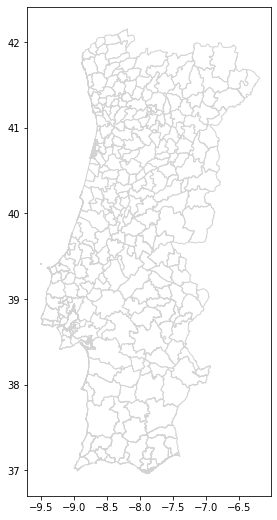

In [521]:
new_map_df.plot(color='white', edgecolor='lightgrey', figsize=(11,9))

### Group per city

In [522]:
Final_table.groupby('QREN_Concelho').count()

,Incorporation_(t0),Date_of_first_intervention_(t1),Maximum_Reported_Investment_(in_t2),Total_FINOVA,N_Investors_FINOVA,Total_Increase_in_SC_from_1st_intervention_(t1),SC_Final_Intervention_(in_t2),Total_Increase_SC_(Inv),Percentage_of_special_class_shares,NACE,Company_not_based_in_PT,Exit,Share_Classes,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento Elegivel_Total,QREN_Sector,QREN_CAE_(Rev3),QREN_Instrumento,QREN_Regiao,QREN_Data_de_Aprovacao,INPI_NICE_N,INPI_modalidade_N,INPI_modalidade_Moda,INPI_NICE_moda,INPI_dt_ini_vigencia,INPI_Patents_ipc,INPI_Patents_ipc_count,INPI_Patents_count_moda,INPI-Patents_moda_mode,INPI_Patents_date,INPI_Design_moda,INPI_Design_moda_count,INPI_Design_fase_actual,INPI_Design_date,IPR,IPR_P,NIF
QREN_Concelho,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Almada,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aveiro,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Beja,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Braga,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Cantanhede,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Coimbra,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Covilha,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Guimaraes,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Lisboa,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [523]:
new_map_df = map_df[map_df.NAME_1 != 'Madeira']
new_map_df = new_map_df[new_map_df.NAME_1 != 'Azores']

In [524]:
Final_table.set_index('QREN_Concelho').join(new_map_df.set_index('NAME_2'))
pp = new_map_df.join(Final_table.set_index('QREN_Concelho'), on='NAME_2')

In [526]:
pp['NAME_1'].unique()

array(['Évora', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco',
       'Coimbra', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre',
       'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real',
       'Viseu'], dtype=object)

In [527]:
mean_investment = pp['QREN_Investimento_Elegivel_N_Operações'].groupby([pp['NAME_2']]).mean()
mean_investment

NAME_2
Abrantes             NaN
Aguiar da Beira      NaN
Alandroal            NaN
Albergaria-a-Velha   NaN
Albufeira            NaN
                      ..
Vouzela              NaN
Águeda               NaN
Évora                NaN
Ílhavo               NaN
Óbidos               NaN
Name: QREN_Investimento_Elegivel_N_Operações, Length: 276, dtype: float64

In [528]:
abcc = pp.groupby(['QREN_Sector','NAME_1'])['QREN_Sector'].count()

In [530]:
count_investment = pp['QREN_Investimento_Elegivel_N_Operações'].groupby([pp['NAME_2']]).count()
count_investment.sort_values(ascending=False)

NAME_2
Porto                10
Coimbra               6
Cantanhede            3
Lisboa                2
Aveiro                2
                     ..
Penafiel              0
Penacova              0
Pedrógão Grande       0
Paços de Ferreira     0
Abrantes              0
Name: QREN_Investimento_Elegivel_N_Operações, Length: 276, dtype: int64

In [531]:
#sector = pp.groupby(by='Sector')['NAME_2'].count()
sector = pp['QREN_Sector'].groupby([pp['NAME_2']]).count()
sector.sort_values(ascending=False)

NAME_2
Porto                10
Coimbra               6
Cantanhede            3
Lisboa                2
Aveiro                2
                     ..
Penafiel              0
Penacova              0
Pedrógão Grande       0
Paços de Ferreira     0
Abrantes              0
Name: QREN_Sector, Length: 276, dtype: int64

In [533]:
total_investment = pp['QREN_Investimento Elegivel_Total'].groupby([pp['NAME_2']]).sum()
total_investment.sort_values(ascending=False)

NAME_2
Cantanhede           21502887.0
Porto                 5760158.0
Braga                 5302356.0
Maia                  4907440.0
Coimbra               4132868.0
                        ...    
Penafiel                    0.0
Penacova                    0.0
Pedrógão Grande             0.0
Paços de Ferreira           0.0
Abrantes                    0.0
Name: QREN_Investimento Elegivel_Total, Length: 276, dtype: float64

In [534]:
new_map_df = new_map_df.join(count_investment, on='NAME_2', how='left', lsuffix='_left', rsuffix='_right')
new_map_df.head(15)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,QREN_Investimento_Elegivel_N_Operações
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506...",0
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343...",0
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472...",0
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329...",0
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066...",0
5,182,PRT,Portugal,1,Évora,6,Montemor-o-Novo,PT.EV.MN,0,0706,Concelho,Municipality,None,None,"POLYGON ((-8.30155 38.86049, -8.30142 38.86032...",0
6,182,PRT,Portugal,1,Évora,7,Mora,PT.EV.MR,0,0707,Concelho,Municipality,None,None,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",0
7,182,PRT,Portugal,1,Évora,8,Mourão,PT.EV.MO,0,0708,Concelho,Municipality,None,None,"POLYGON ((-7.31600 38.43931, -7.31559 38.43918...",0
8,182,PRT,Portugal,1,Évora,9,Portel,PT.EV.PO,0,0709,Concelho,Municipality,None,None,"POLYGON ((-7.68529 38.43260, -7.68513 38.43241...",0
9,182,PRT,Portugal,1,Évora,10,Redondo,PT.EV.RD,0,0710,Concelho,Municipality,None,None,"POLYGON ((-7.53326 38.74098, -7.53298 38.74092...",0


Text(0.5, 1.0, 'Numbers of operations')

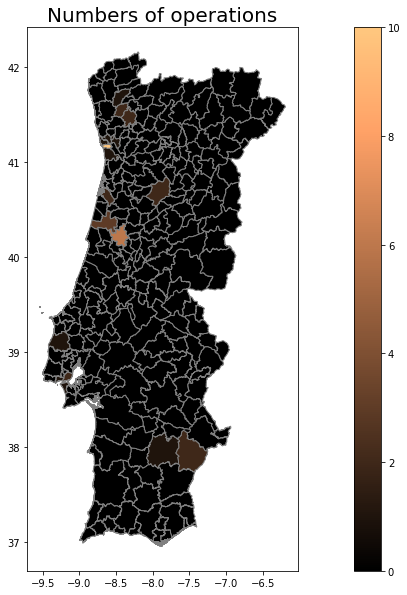

In [537]:
new_map_df["QREN_Investimento_Elegivel_N_Operações"] = new_map_df["QREN_Investimento_Elegivel_N_Operações"].astype('int64')
aa = new_map_df.plot(column='QREN_Investimento_Elegivel_N_Operações',figsize=(20,10), cmap='copper', legend=True, edgecolor='grey')
aa.set_title('Numbers of operations', fontsize=20) 

In [536]:
new_map_df["QREN_Investimento_Elegivel_N_Operações"].sum()

40

In [538]:
new_map_df = new_map_df.join(total_investment, on='NAME_2', how='left', lsuffix='_left', rsuffix='_right')
new_map_df.head(15)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,QREN_Investimento_Elegivel_N_Operações,QREN_Investimento Elegivel_Total
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506...",0,0.0
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343...",0,0.0
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472...",0,0.0
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329...",0,0.0
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066...",0,0.0
5,182,PRT,Portugal,1,Évora,6,Montemor-o-Novo,PT.EV.MN,0,0706,Concelho,Municipality,None,None,"POLYGON ((-8.30155 38.86049, -8.30142 38.86032...",0,0.0
6,182,PRT,Portugal,1,Évora,7,Mora,PT.EV.MR,0,0707,Concelho,Municipality,None,None,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",0,0.0
7,182,PRT,Portugal,1,Évora,8,Mourão,PT.EV.MO,0,0708,Concelho,Municipality,None,None,"POLYGON ((-7.31600 38.43931, -7.31559 38.43918...",0,0.0
8,182,PRT,Portugal,1,Évora,9,Portel,PT.EV.PO,0,0709,Concelho,Municipality,None,None,"POLYGON ((-7.68529 38.43260, -7.68513 38.43241...",0,0.0
9,182,PRT,Portugal,1,Évora,10,Redondo,PT.EV.RD,0,0710,Concelho,Municipality,None,None,"POLYGON ((-7.53326 38.74098, -7.53298 38.74092...",0,0.0


Text(0.5, 1.0, 'Total Amount granted')

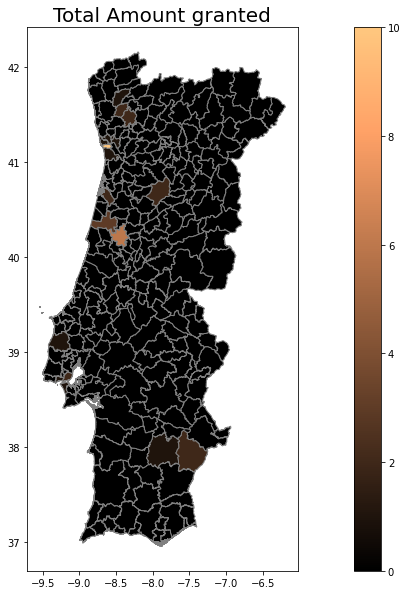

In [539]:
new_map_df["QREN_Investimento_Elegivel_N_Operações"] = new_map_df["QREN_Investimento_Elegivel_N_Operações"].astype('int64')
aaa = new_map_df.plot(column='QREN_Investimento_Elegivel_N_Operações',figsize=(20,10), cmap='copper', legend=True, edgecolor='grey')
aaa.set_title('Total Amount granted', fontsize=20) 